# Labs Access Analysis: 03 Map Plot City Only

# Setup

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
import json
pd.options.mode.chained_assignment = None
import branca.colormap as cmp
import os
import time
import folium
from matplotlib.patches import Patch

# Change the font
sns.set_context("poster", font_scale=1.5)
sns.set_style(style="whitegrid")
matplotlib.rc('font', family='serif', serif='Fira Sans')

In [2]:
# Load data, json
with open('data/isochrones.json') as json_file:
    data = json.load(json_file)

In [3]:
# Load data, csv
labs = pd.read_csv('data/labs.csv')

In [4]:
labs

Name                   Type                   City  \
0           Fab Lab Barcelona                Fab Lab              Barcelona   
1   MADE Makerspace Barcelona                Fab Lab              Barcelona   
2                   Soko Tech                Fab Lab              Barcelona   
3                   LSCongres                Fab Lab              Barcelona   
4               Green Fab Lab                Fab Lab  Cerdanyola del Vallès   
..                        ...                    ...                    ...   
63                   Canodrom             City Space              Barcelona   
64     Cibernàrium Nou Barris  Incubator/Accelerator              Barcelona   
65            Cibernàrium 22@  Incubator/Accelerator              Barcelona   
66            Fundació Comtal             Foundation              Barcelona   
67           Fundació Avismón             Foundation              Barcelona   

   Cluster                                 Address     CAP        Lat  \
0      BCN                  Carrer de Pujades, 102  8005.0  41.396925   
1      BCN          Carrer Noguera Pallaresa 59-61  8014.0  41.373238   
2      BCN            Carrer de Vallès i Ribot, 36  8027.0  41.424535   
3      BCN      Carrer del Cardenal Tedeschini, 50  8027.0  41.426002   
4      BCN  Ctra. BV-1415 (Horta-Cerdanyola), km 7  8290.0  41.450394   
..     ...                                     ...     ...        ...   
63     BCN        Carrer de Concepción Arenal, 165  8027.0  41.427734   
64     BCN                Carrer Marie Curie, 8-14  8042.0  41.437469   
65     BCN                        Roc Boronat, 117  8018.0  41.403164   
66     BCN              Carrer Forn de la Fonda, 5  8003.0  41.386901   
67     BCN            Carrer dels Jocs Florals, 59  8014.0  41.374107   

        Long                                             Source  \
0   2.194335                                         Fablabs.io   
1   2.141084  Fablabs.io, Hackerspaces.org, Makerspaces.make.co   
2   2.188883                                         Fablabs.io   
3   2.182026                                         Fablabs.io   
4   2.133441                                         Fablabs.io   
..       ...                                                ...   
63  2.183339            Ajuntament de Barcelona policy document   
64  2.169056            Ajuntament de Barcelona policy document   
65  2.194483            Ajuntament de Barcelona policy document   
66  2.179529            Ajuntament de Barcelona policy document   
67  2.134948            Ajuntament de Barcelona policy document   

                                                  URL Notes  
0                              https://fablabbcn.org/   NaN  
1                                                 NaN   NaN  
2                                  https://soko.tech/   NaN  
3                   https://fablabs.io/labs/lscongres   NaN  
4                                                 NaN   NaN  
..                                                ...   ...  
63                        https://canodrom.barcelona/   NaN  
64  https://cibernarium.barcelonactiva.cat/ciberna...   NaN  
65  https://cibernarium.barcelonactiva.cat/en/edif...   NaN  
66                                https://comtal.org/   NaN  
67                            http://www.avismon.org/   NaN  

[68 rows x 11 columns]

In [5]:
searchfor = ['Barcelona', 'Milan']
city_labs = labs[labs.City.str.contains('|'.join(searchfor))]

In [6]:
city_labs

Name                   Type  \
0                                   Fab Lab Barcelona                Fab Lab   
1                           MADE Makerspace Barcelona                Fab Lab   
2                                           Soko Tech                Fab Lab   
3                                           LSCongres                Fab Lab   
5                              Barcelona Mobility LAB                Fab Lab   
7                                  Frankestein Garage                Fab Lab   
8                          The FabLab: Make in Milano                Fab Lab   
9                                 Vectorealism FabLab                Service   
10                                          DamASpace                Fab Lab   
11            Miocugino - officina di gesta e ingegno             Makerspace   
12                                            Opendot                Fab Lab   
13                                        Polifactory         University Lab   
14                         WeMake | Makerspace Fablab                Fab Lab   
15                                     FabLab Ventura                Fab Lab   
16                        FabLabMilano - Fare le Idee                Fab Lab   
20                         Politecnico Open unix Labs            Hackerspace   
21                                             Danaus            Hackerspace   
22                               AKASHA Hub Barcelona            Hackerspace   
23                                        kernelpanic            Hackerspace   
24                                          Openspace            Hackerspace   
25                                  DIY Bio Barcelona             DIYBio Lab   
26                                      Maker Convent             Makerspace   
27                                      MakerspaceBCN             Makerspace   
28                     Ateneu de Fabricació Les Corts   Ateneu de Fabricació   
29            Ateneu de Fabricació La Fàbrica del Sol   Ateneu de Fabricació   
30              Ateneu de Fabricació Ciutat Meridiana   Ateneu de Fabricació   
31               Ateneu de Fabricació Parc Tecnológic   Ateneu de Fabricació   
32                        Ateneu de Fabricació Gràcia   Ateneu de Fabricació   
33                                     PechBlenda Lab             DIYBio Lab   
34                    Ateneu de Fabricació Ca L'Alier   Ateneu de Fabricació   
35                   Punt Multimedia FAB Casa del Mig             City Space   
36                          Punt Multimedia La Marina             City Space   
37  Club Maker de l'American Space - Biblioteca Fa...                Library   
38                                    Makers Zone BCN             Makerspace   
39                                  FabCafé Barcelona                FabCafé   
40                                               TMDC             Makerspace   
42                                    Ripolab Hacklab            Hackerspace   
43                                             ATTA33                Service   
44                                             Kinlab             DIYBio Lab   
45                                         SuperForma                Service   
46                                         Makers Hub             Makerspace   
47                                   Milano Luiss Hub             Makerspace   
48                                              YATTA             Makerspace   
49                                RavalFab / Colectic                Fab Lab   
51                                      IED Maker Lab         University Lab   
52  Punt Òmnia Casal Cívic Barcelona - Verdum - Fu...             City Space   
53                                 DFactory Barcelona  Incubator/Accelerator   
54                       Locanda Officina Monumentale  Incubator/Accelerator   
55                                  Ideas Bit Factory                Service   
56                                   Share Makers

In [7]:
closed_labs = city_labs[city_labs.Notes.str.contains("losed")==True]
city_labs = city_labs[~city_labs.index.isin(closed_labs.index)]

In [8]:
city_labs

Name                   Type  \
0                                   Fab Lab Barcelona                Fab Lab   
1                           MADE Makerspace Barcelona                Fab Lab   
2                                           Soko Tech                Fab Lab   
3                                           LSCongres                Fab Lab   
5                              Barcelona Mobility LAB                Fab Lab   
8                          The FabLab: Make in Milano                Fab Lab   
9                                 Vectorealism FabLab                Service   
10                                          DamASpace                Fab Lab   
11            Miocugino - officina di gesta e ingegno             Makerspace   
12                                            Opendot                Fab Lab   
13                                        Polifactory         University Lab   
14                         WeMake | Makerspace Fablab                Fab Lab   
15                                     FabLab Ventura                Fab Lab   
16                        FabLabMilano - Fare le Idee                Fab Lab   
20                         Politecnico Open unix Labs            Hackerspace   
21                                             Danaus            Hackerspace   
22                               AKASHA Hub Barcelona            Hackerspace   
25                                  DIY Bio Barcelona             DIYBio Lab   
26                                      Maker Convent             Makerspace   
28                     Ateneu de Fabricació Les Corts   Ateneu de Fabricació   
29            Ateneu de Fabricació La Fàbrica del Sol   Ateneu de Fabricació   
30              Ateneu de Fabricació Ciutat Meridiana   Ateneu de Fabricació   
31               Ateneu de Fabricació Parc Tecnológic   Ateneu de Fabricació   
32                        Ateneu de Fabricació Gràcia   Ateneu de Fabricació   
34                    Ateneu de Fabricació Ca L'Alier   Ateneu de Fabricació   
35                   Punt Multimedia FAB Casa del Mig             City Space   
36                          Punt Multimedia La Marina             City Space   
37  Club Maker de l'American Space - Biblioteca Fa...                Library   
38                                    Makers Zone BCN             Makerspace   
39                                  FabCafé Barcelona                FabCafé   
40                                               TMDC             Makerspace   
43                                             ATTA33                Service   
44                                             Kinlab             DIYBio Lab   
45                                         SuperForma                Service   
46                                         Makers Hub             Makerspace   
47                                   Milano Luiss Hub             Makerspace   
48                                              YATTA             Makerspace   
49                                RavalFab / Colectic                Fab Lab   
51                                      IED Maker Lab         University Lab   
52  Punt Òmnia Casal Cívic Barcelona - Verdum - Fu...             City Space   
53                                 DFactory Barcelona  Incubator/Accelerator   
54                       Locanda Officina Monumentale  Incubator/Accelerator   
55                                  Ideas Bit Factory                Service   
56                                   Share Makerspace             Makerspace   
57                                          Recipient             Makerspace   
58                                      Camins Makers         University Lab   
60                              Racó.net del Guinardó             City Space   
61                            Espai Jove Casa Sagnier             City Space   
62                          EASD Llotja - Sant Andreu         University Lab   
63                                           Cano

In [9]:
locations = {}
for i in data:
    if (i['name'] in city_labs["Name"].values):
        locations[i['name']] = i['metadata']['query']['locations'][0]

In [10]:
# Remove the metropolital labs from the isochrones data
for i in data:
    if (i['name'] not in city_labs["Name"].values):
        print("Removed",i['name'])
        data.remove(i)
        
# One lab is not removed at first iteration??
for i in data:
    if (i['name'] not in city_labs["Name"].values):
        print("Removed",i['name'])
        data.remove(i)

Removed Green Fab Lab
Removed Fab Lab Sant Cugat
Removed Multilab Rozzano
Removed W!LAB
Removed Disseny Lab UAB
Removed BDN Lab
Removed EspluLab
Removed Fab Lab Tinkerers


## Map Visualization

In [11]:
m=folium.Map(location=[41.396721,2.1943200000000003])
folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)

In [12]:
for loc in locations:
  folium.Marker(location=[locations[loc][1],locations[loc][0]],popup=loc,tooltip=loc).add_to(m)

In [13]:
m

In [14]:
rows = []
for h in data:
    if (h['name'] in city_labs["Name"].values):
        rows.append([h["name"], h["features"][0]["properties"]["total_pop"], h["features"][0]["properties"]["area"], h["features"][0]["properties"]["reachfactor"], h["features"][0]["geometry"]["coordinates"], []])

In [15]:
map_data = pd.DataFrame(rows, columns=['Name', 'total_pop', 'area', 'reachfactor','geometry', 'isochrone'])
map_data.head()

Name  total_pop        area  reachfactor  \
0          Fab Lab Barcelona    85512.0  4414692.78       0.8994   
1  MADE Makerspace Barcelona    88686.0  4388387.03       0.8940   
2                  Soko Tech    90167.0  4342783.41       0.8847   
3                  LSCongres    95371.0  4470928.42       0.9108   
4     Barcelona Mobility LAB    12691.0   633895.88       0.1291   

                                            geometry isochrone  
0  [[[2.181814, 41.394814], [2.181818, 41.394634]...        []  
1  [[[2.127469, 41.374827], [2.128301, 41.370212]...        []  
2  [[[2.174851, 41.424714], [2.174888, 41.423775]...        []  
3  [[[2.167014, 41.427727], [2.167345, 41.426543]...        []  
4  [[[2.194385, 41.435171], [2.194398, 41.435131]...        []

In [16]:
# Transform the areas in square km
map_data["area"] = map_data["area"] / 1000000.0

In [17]:
# Create a flip isochrone cell for each lab
for ind in map_data.index:
     row_iso = []
     for coords in map_data['geometry'][ind][0]:
       row_iso.append([coords[1], coords[0], 900])
     map_data.at[ind, 'isochrone'] = row_iso

In [18]:
map_data.set_index('Name', inplace=True)
city_labs.set_index('Name', inplace=True)

In [19]:
# Add columns from the .csv to the .json
full_map_data = map_data.join(city_labs)

In [20]:
full_map_data

total_pop      area  \
Name                                                                      
Fab Lab Barcelona                                     85512.0  4.414693   
MADE Makerspace Barcelona                             88686.0  4.388387   
Soko Tech                                             90167.0  4.342783   
LSCongres                                             95371.0  4.470928   
Barcelona Mobility LAB                                12691.0  0.633896   
The FabLab: Make in Milano                            41892.0  3.806052   
Vectorealism FabLab                                   25465.0  2.835711   
DamASpace                                             58690.0  4.808589   
Miocugino - officina di gesta e ingegno               39476.0  3.879092   
Opendot                                               56925.0  4.149397   
Polifactory                                           30621.0  3.349455   
WeMake | Makerspace Fablab                            40873.0  3.048801   
FabLab Ventura                                        23992.0  3.925234   
FabLabMilano - Fare le Idee                           24012.0  2.665953   
Politecnico Open unix Labs                            60219.0  3.887249   
Danaus                                               100054.0  4.814235   
AKASHA Hub Barcelona                                  95436.0  4.589576   
DIY Bio Barcelona                                     99832.0  4.530496   
Maker Convent                                         87482.0  4.382690   
Ateneu de Fabricació Les Corts                        88373.0  4.230915   
Ateneu de Fabricació La Fàbrica del Sol               47179.0  2.674750   
Ateneu de Fabricació Ciutat Meridiana                 11276.0  1.535244   
Ateneu de Fabricació Parc Tecnológic                  83897.0  4.253709   
Ateneu de Fabricació Gràcia                           97329.0  4.526226   
Ateneu de Fabricació Ca L'Alier                       93219.0  4.521045   
Punt Multimedia FAB Casa del Mig                      91882.0  4.322198   
Punt Multimedia La Marina                             65902.0  3.648157   
Club Maker de l'American Space - Biblioteca Fab...    86930.0  4.159797   
Makers Zone BCN                                       86670.0  4.483313   
FabCafé Barcelona                                     89397.0  4.447150   
TMDC                                                  61950.0  3.195259   
ATTA33                                                94386.0  4.674479   
Kinlab                                                51724.0  4.368656   
SuperForma                                            57463.0  4.490040   
Makers Hub                                            20545.0  3.123252   
Milano Luiss Hub                                      46256.0  4.357870   
YATTA                                                 39433.0  3.727257   
RavalFab / Colectic                                  101992.0  4.732936   
IED Maker Lab                                         90686.0  4.438989   
Punt Òmnia Casal Cívic Barcelona - Verdum - Fun...    70156.0  3.756036   
DFactory Barcelona                                    20821.0  1.016552   
Locanda Officina Monumentale                          33272.0  2.424967   
Ideas Bit Factory                                     33145.0  3.798499   
Share Makerspace                                      11593.0  2.319425   
Recipient                                             30914.0  3.378662   
Camins Makers                                         61277.0  3.542097   
Racó.net del Guinardó                                 91676.0  4.589414   
Espai Jove Casa Sagnier                               94316.0  4.550576   
EASD Llotja - Sant Andreu                             78040.0  3.658226   
Canodrom                                              95440.0  4.447669   
Cibernàrium Nou Barris                                82690.0  4.267126   
Cibernàrium 22@                                       94265.0  4.327991   
Fu

## Population reached

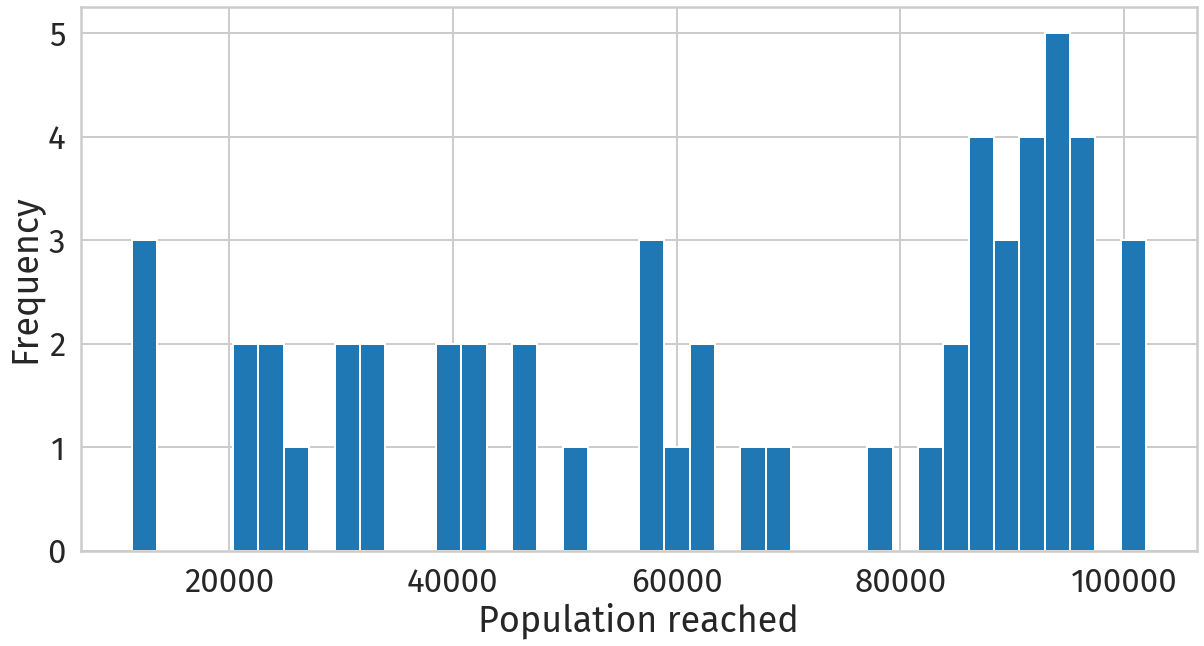

In [21]:
# Plot the data
map_data["total_pop"].plot(kind="hist", bins=40, figsize=(20,10))
plt.xlabel('Population reached')
plt.savefig("svg/city_labs_population_hist.svg", bbox_inches="tight")
plt.savefig("png/city_labs_population_hist.png", dpi=300, bbox_inches="tight")

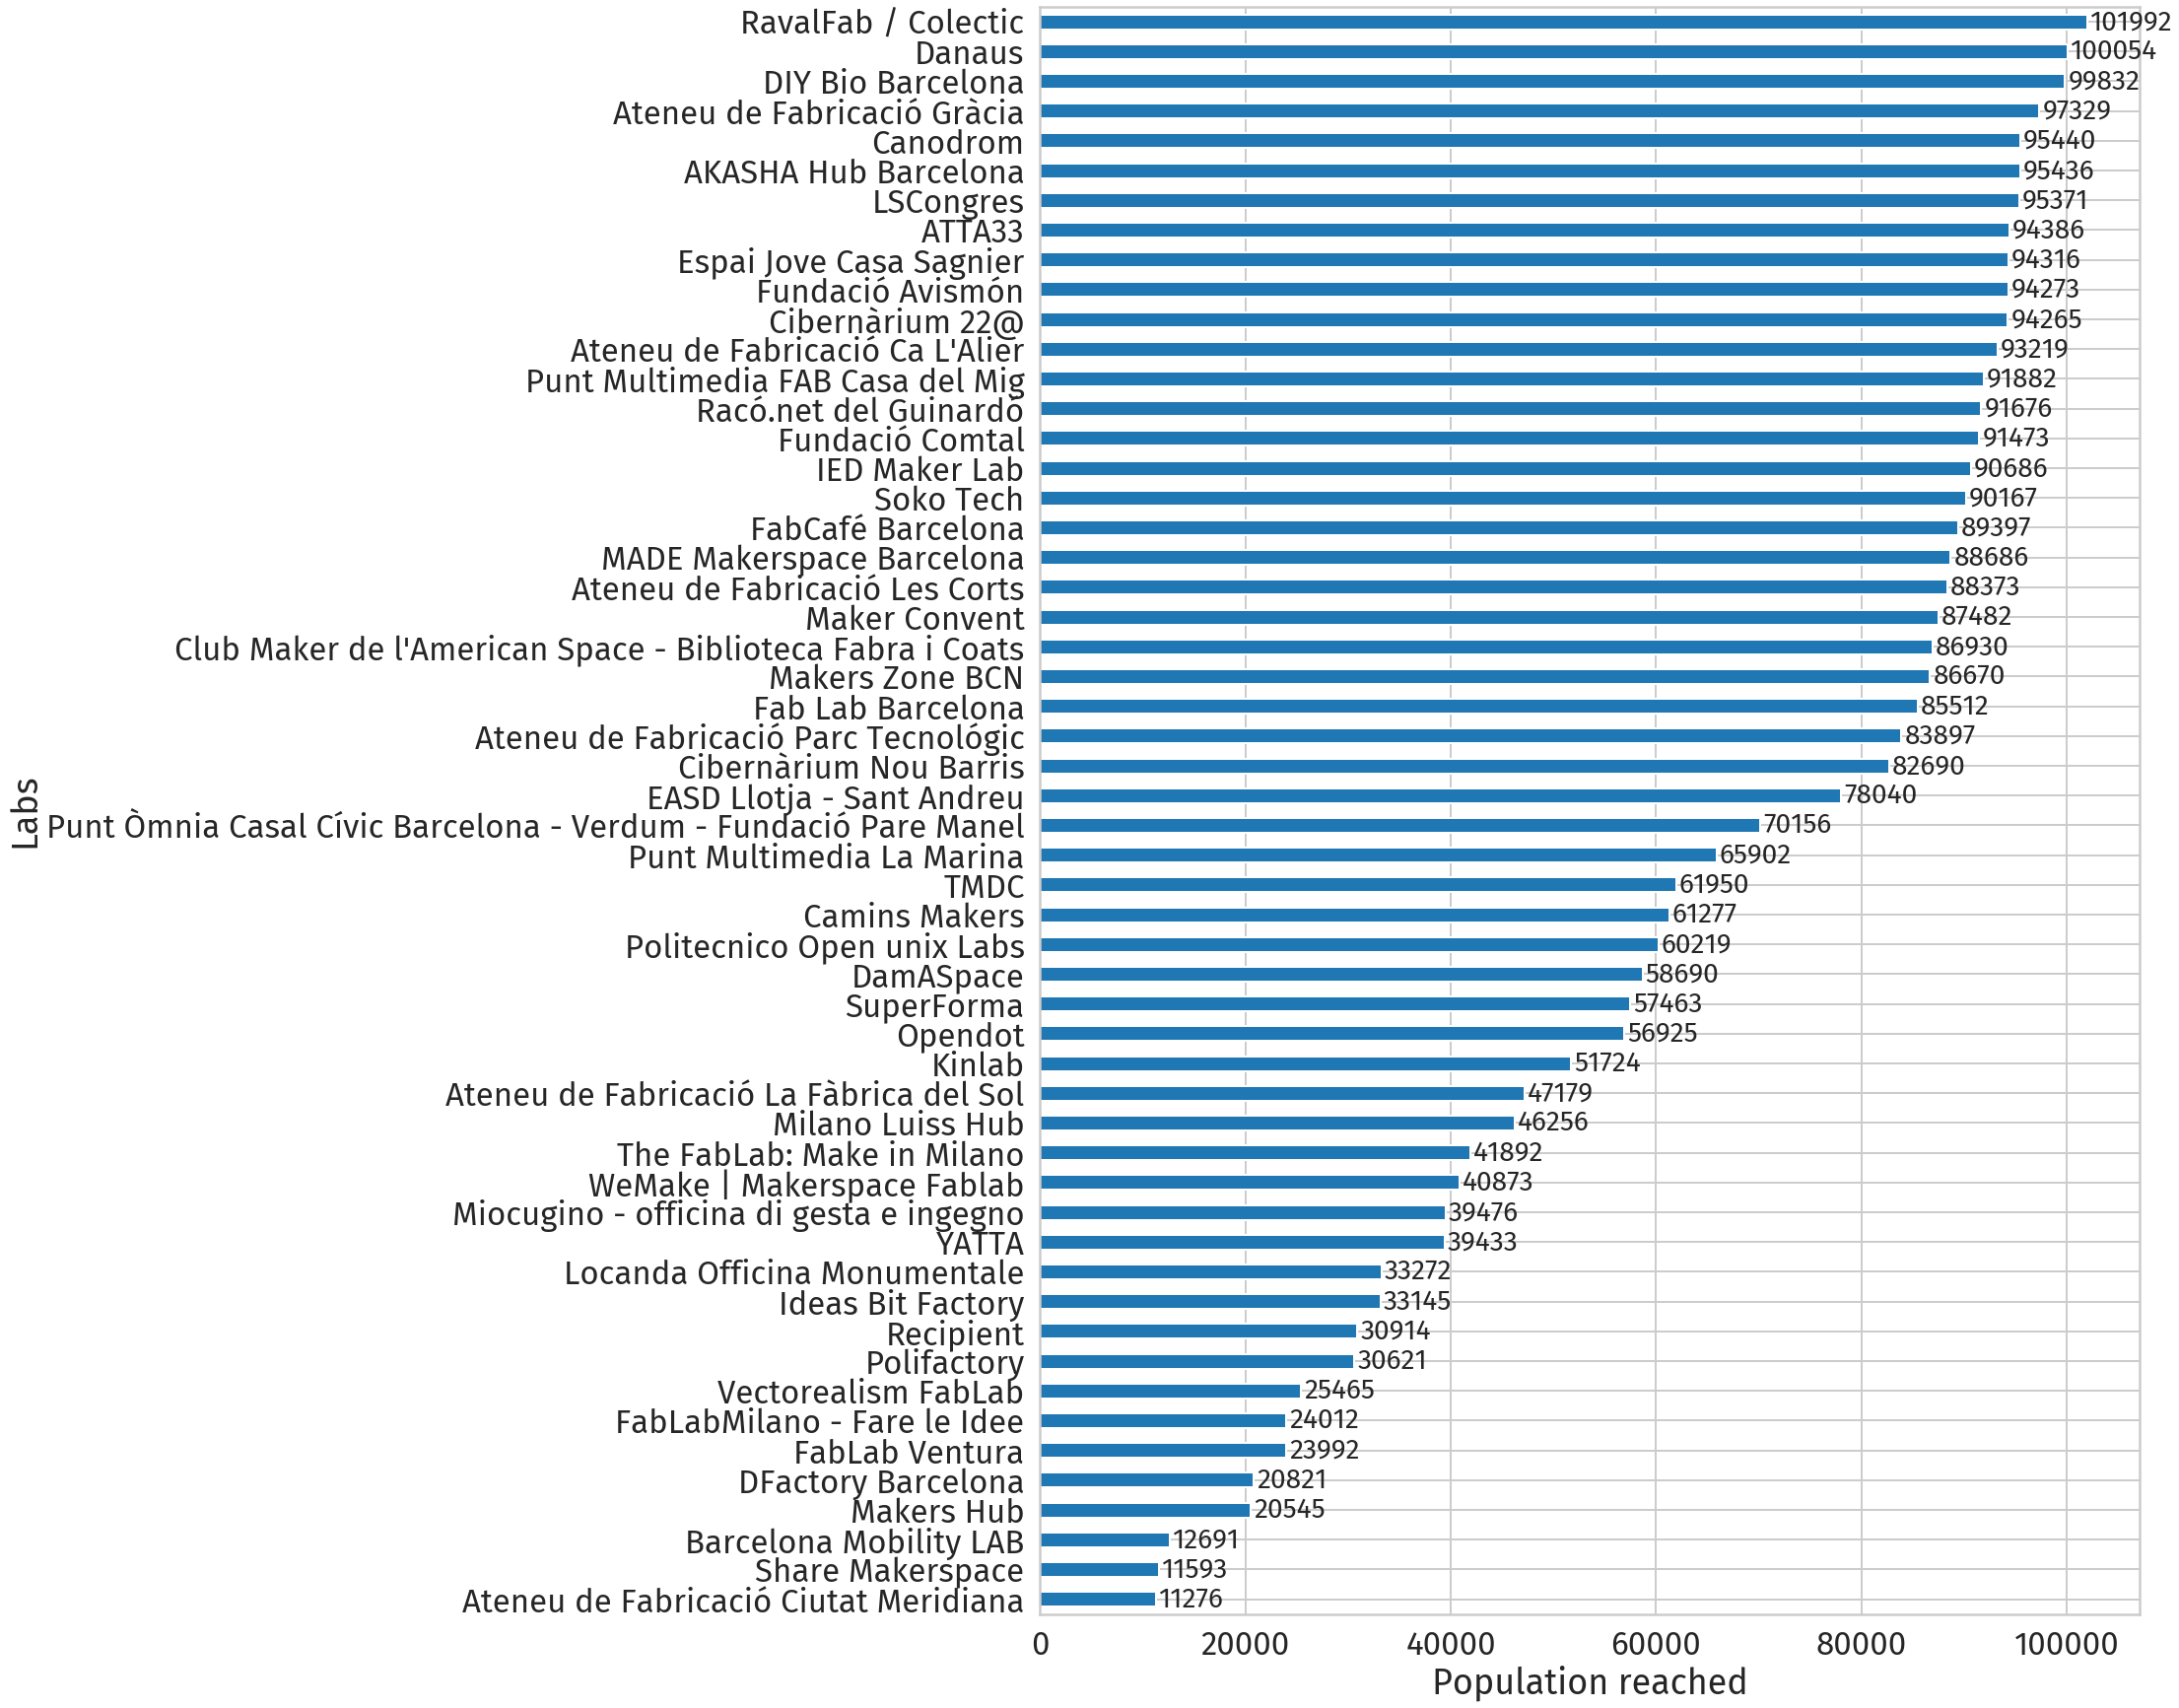

In [22]:
# Plot the data
ax = map_data.sort_values(by=['total_pop'])['total_pop'].plot(kind="barh", figsize=(20,30))
ax.bar_label(ax.containers[0], fmt="%d", size=28, padding=3)
plt.xlabel('Population reached')
plt.ylabel('Labs')
plt.savefig("svg/city_labs_population_bar.svg", bbox_inches="tight")
plt.savefig("png/city_labs_population_bar.png", dpi=300, bbox_inches="tight")

## Area reached

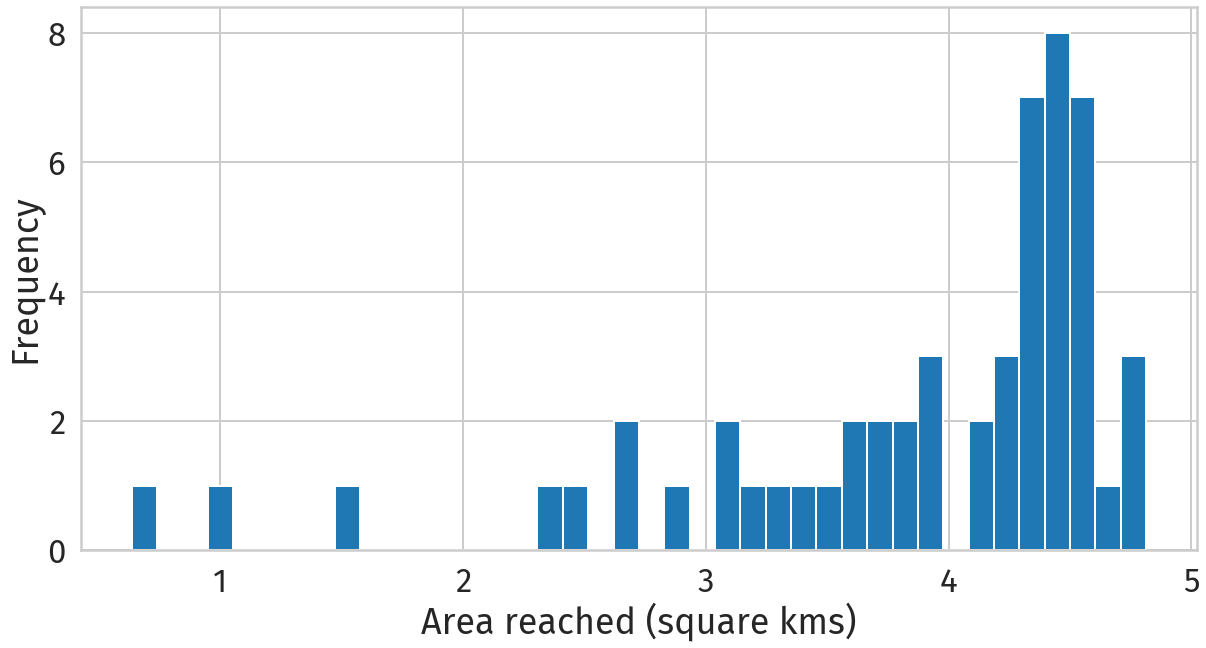

In [23]:
# Plot the data
map_data["area"].plot(kind="hist", bins=40, figsize=(20,10))
plt.xlabel('Area reached (square kms)')
plt.savefig("svg/city_labs_area_hist.svg", bbox_inches="tight")
plt.savefig("png/city_labs_area_hist.png", dpi=300, bbox_inches="tight")

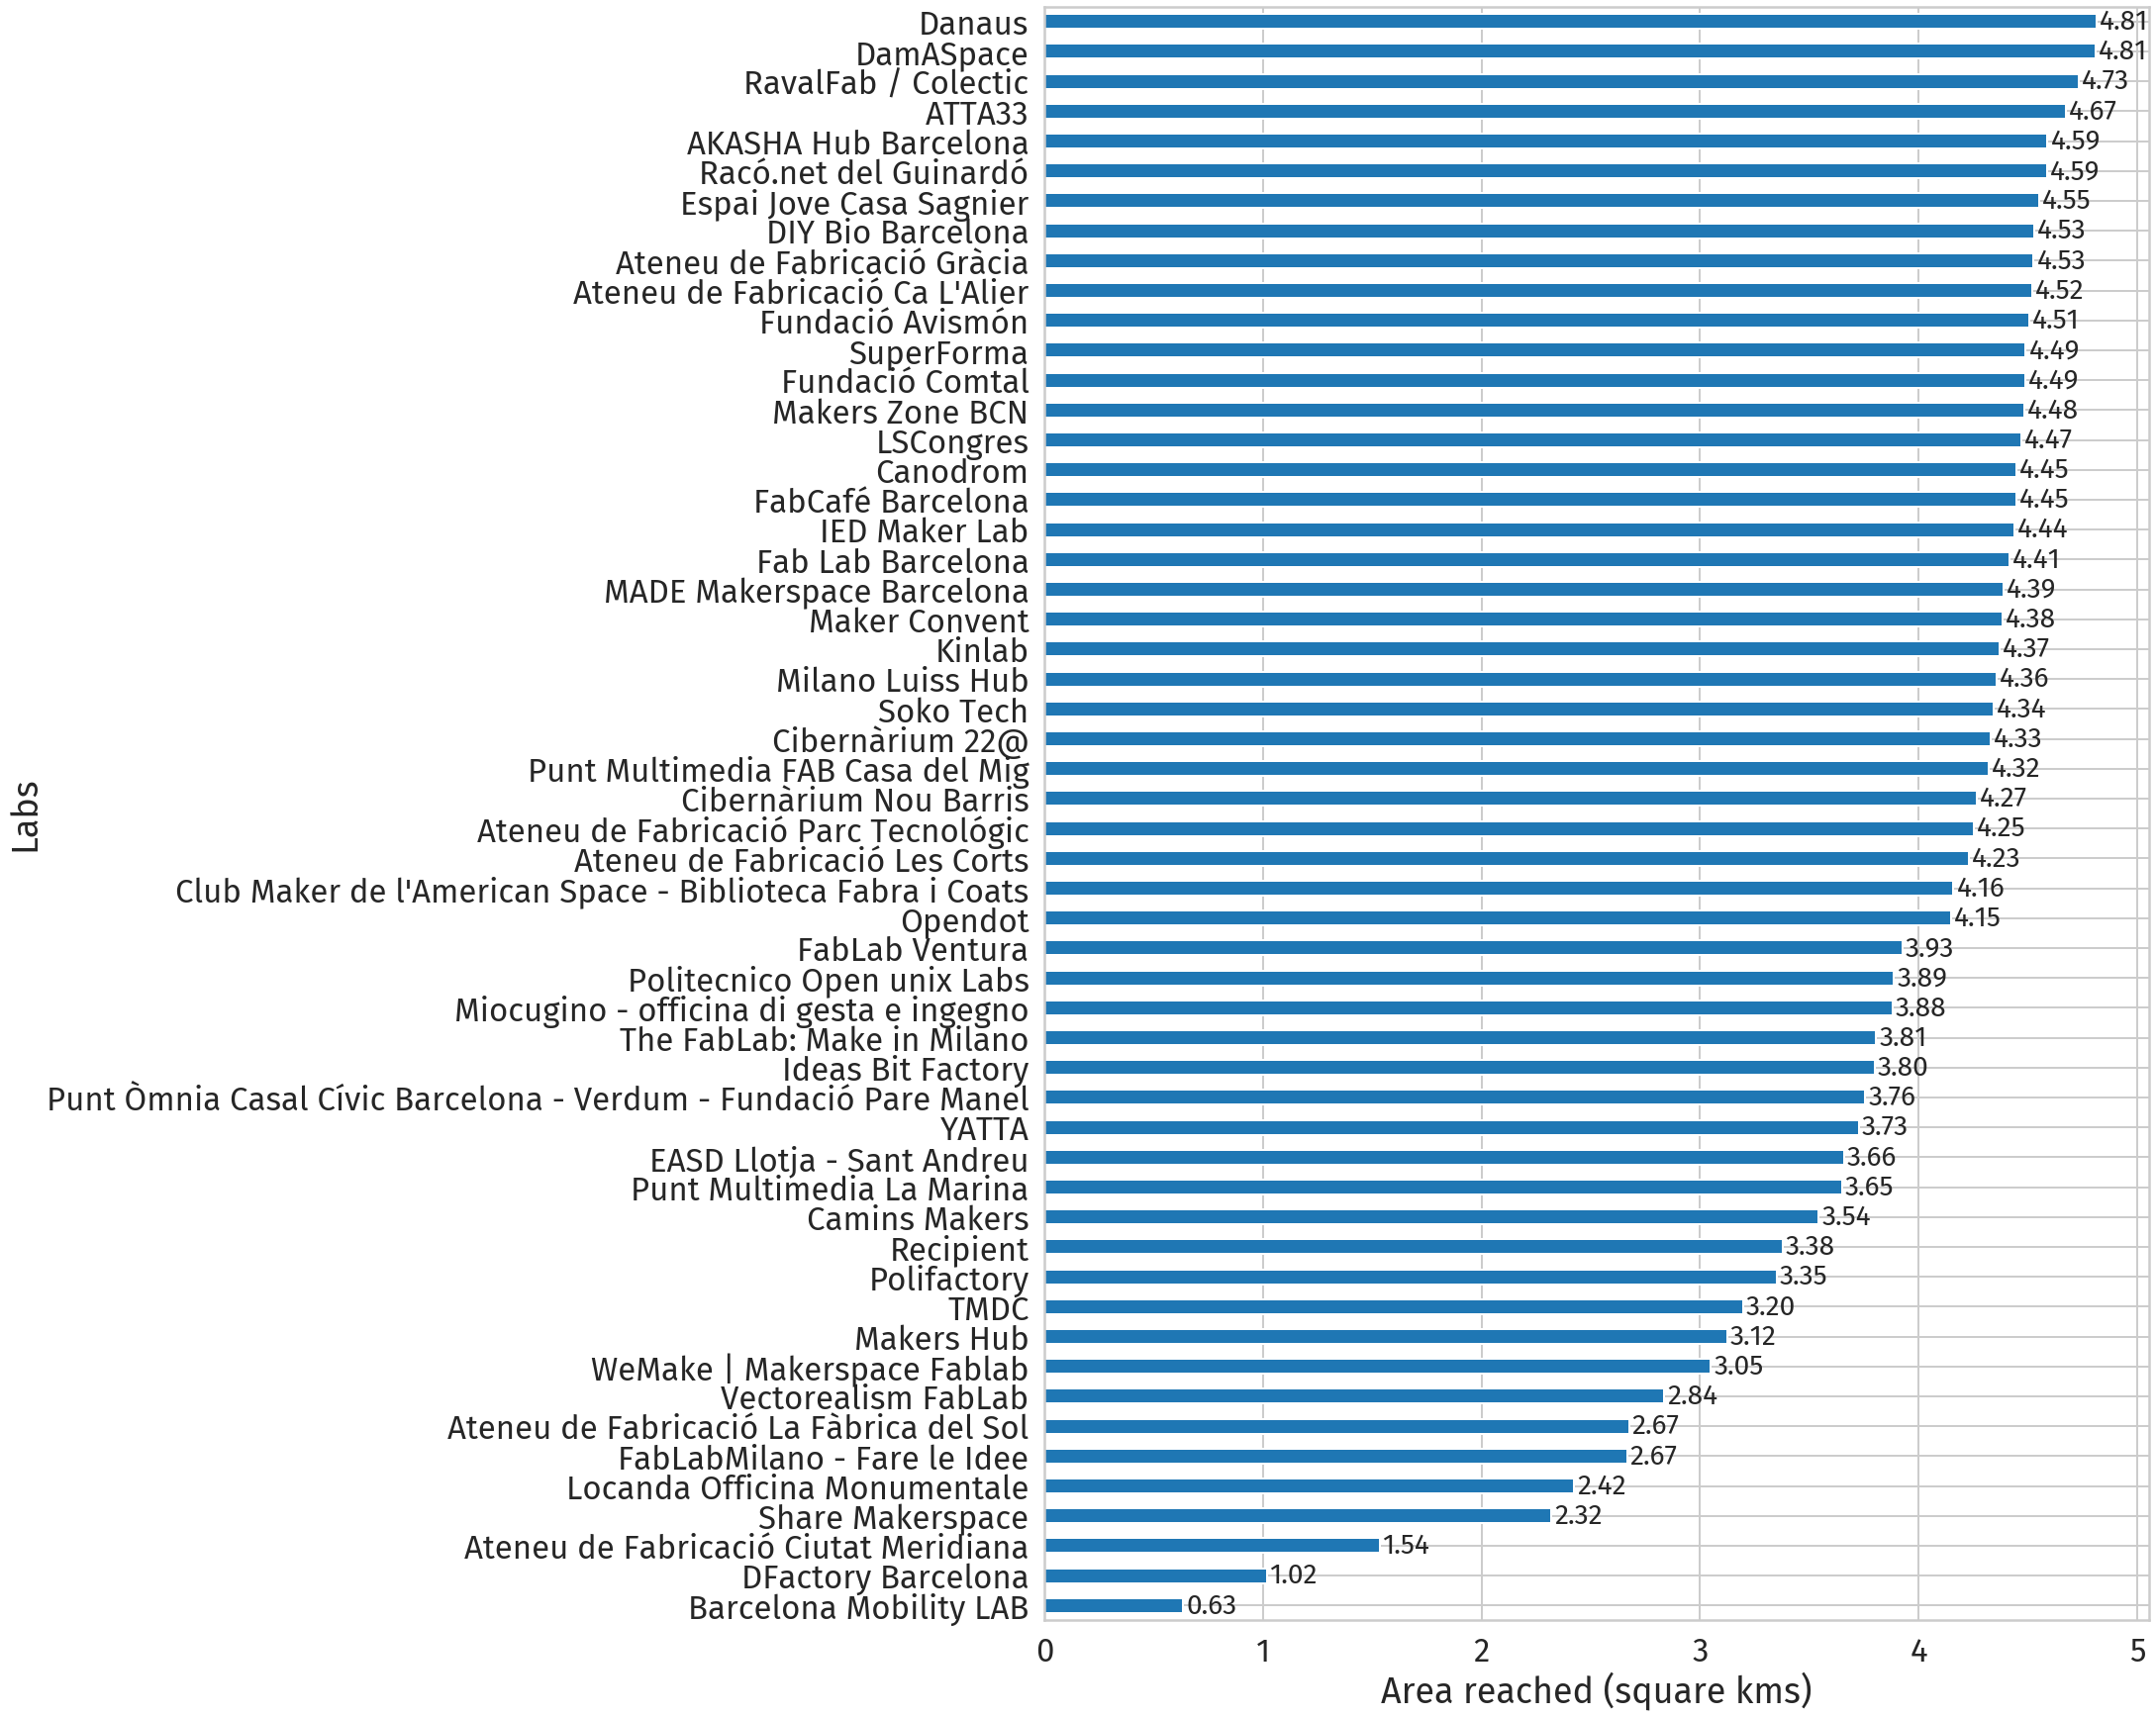

In [24]:
# Plot the data
ax = map_data.sort_values(by=['area'])['area'].plot(kind="barh", figsize=(20,30))
ax.bar_label(ax.containers[0], fmt="%.2f", size=28, padding=3)
plt.xlabel('Area reached (square kms)')
plt.ylabel('Labs')
plt.savefig("svg/city_labs_area_bar.svg", bbox_inches="tight")
plt.savefig("png/city_labs_area_bar.png", dpi=300, bbox_inches="tight")

## Reach Factor

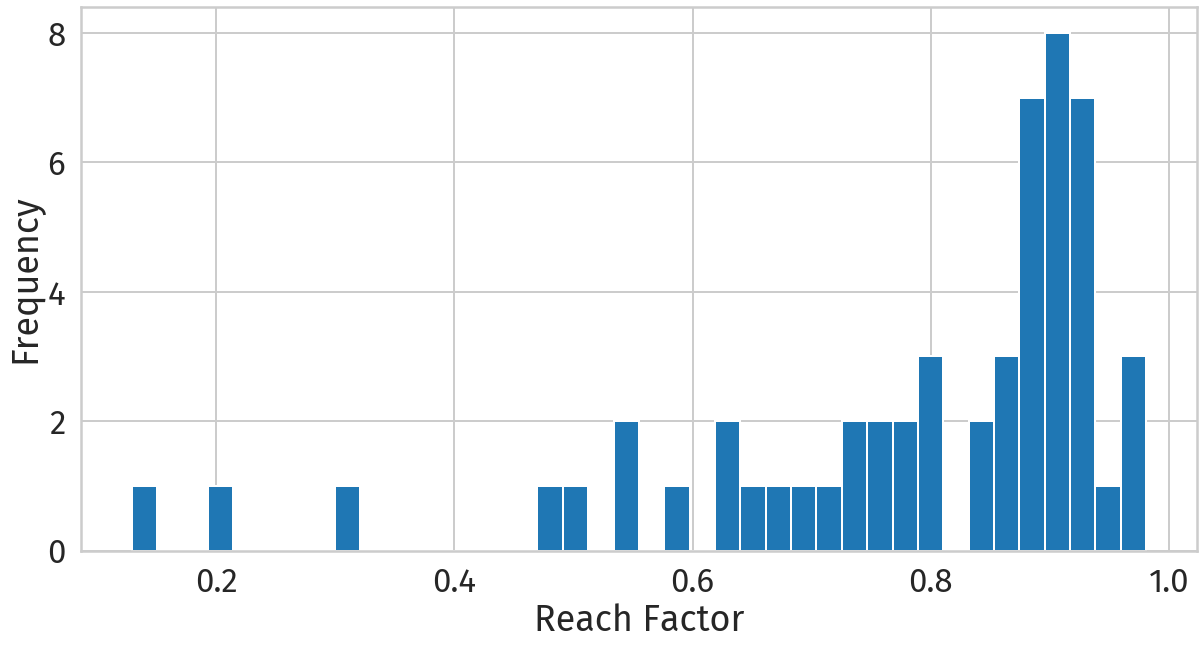

In [25]:
# Plot the data
map_data["reachfactor"].plot(kind="hist", bins=40, figsize=(20,10))
plt.xlabel('Reach Factor')
plt.savefig("svg/city_labs_reachfactor_hist.svg", bbox_inches="tight")
plt.savefig("png/city_labs_reachfactor_hist.png", dpi=300, bbox_inches="tight")

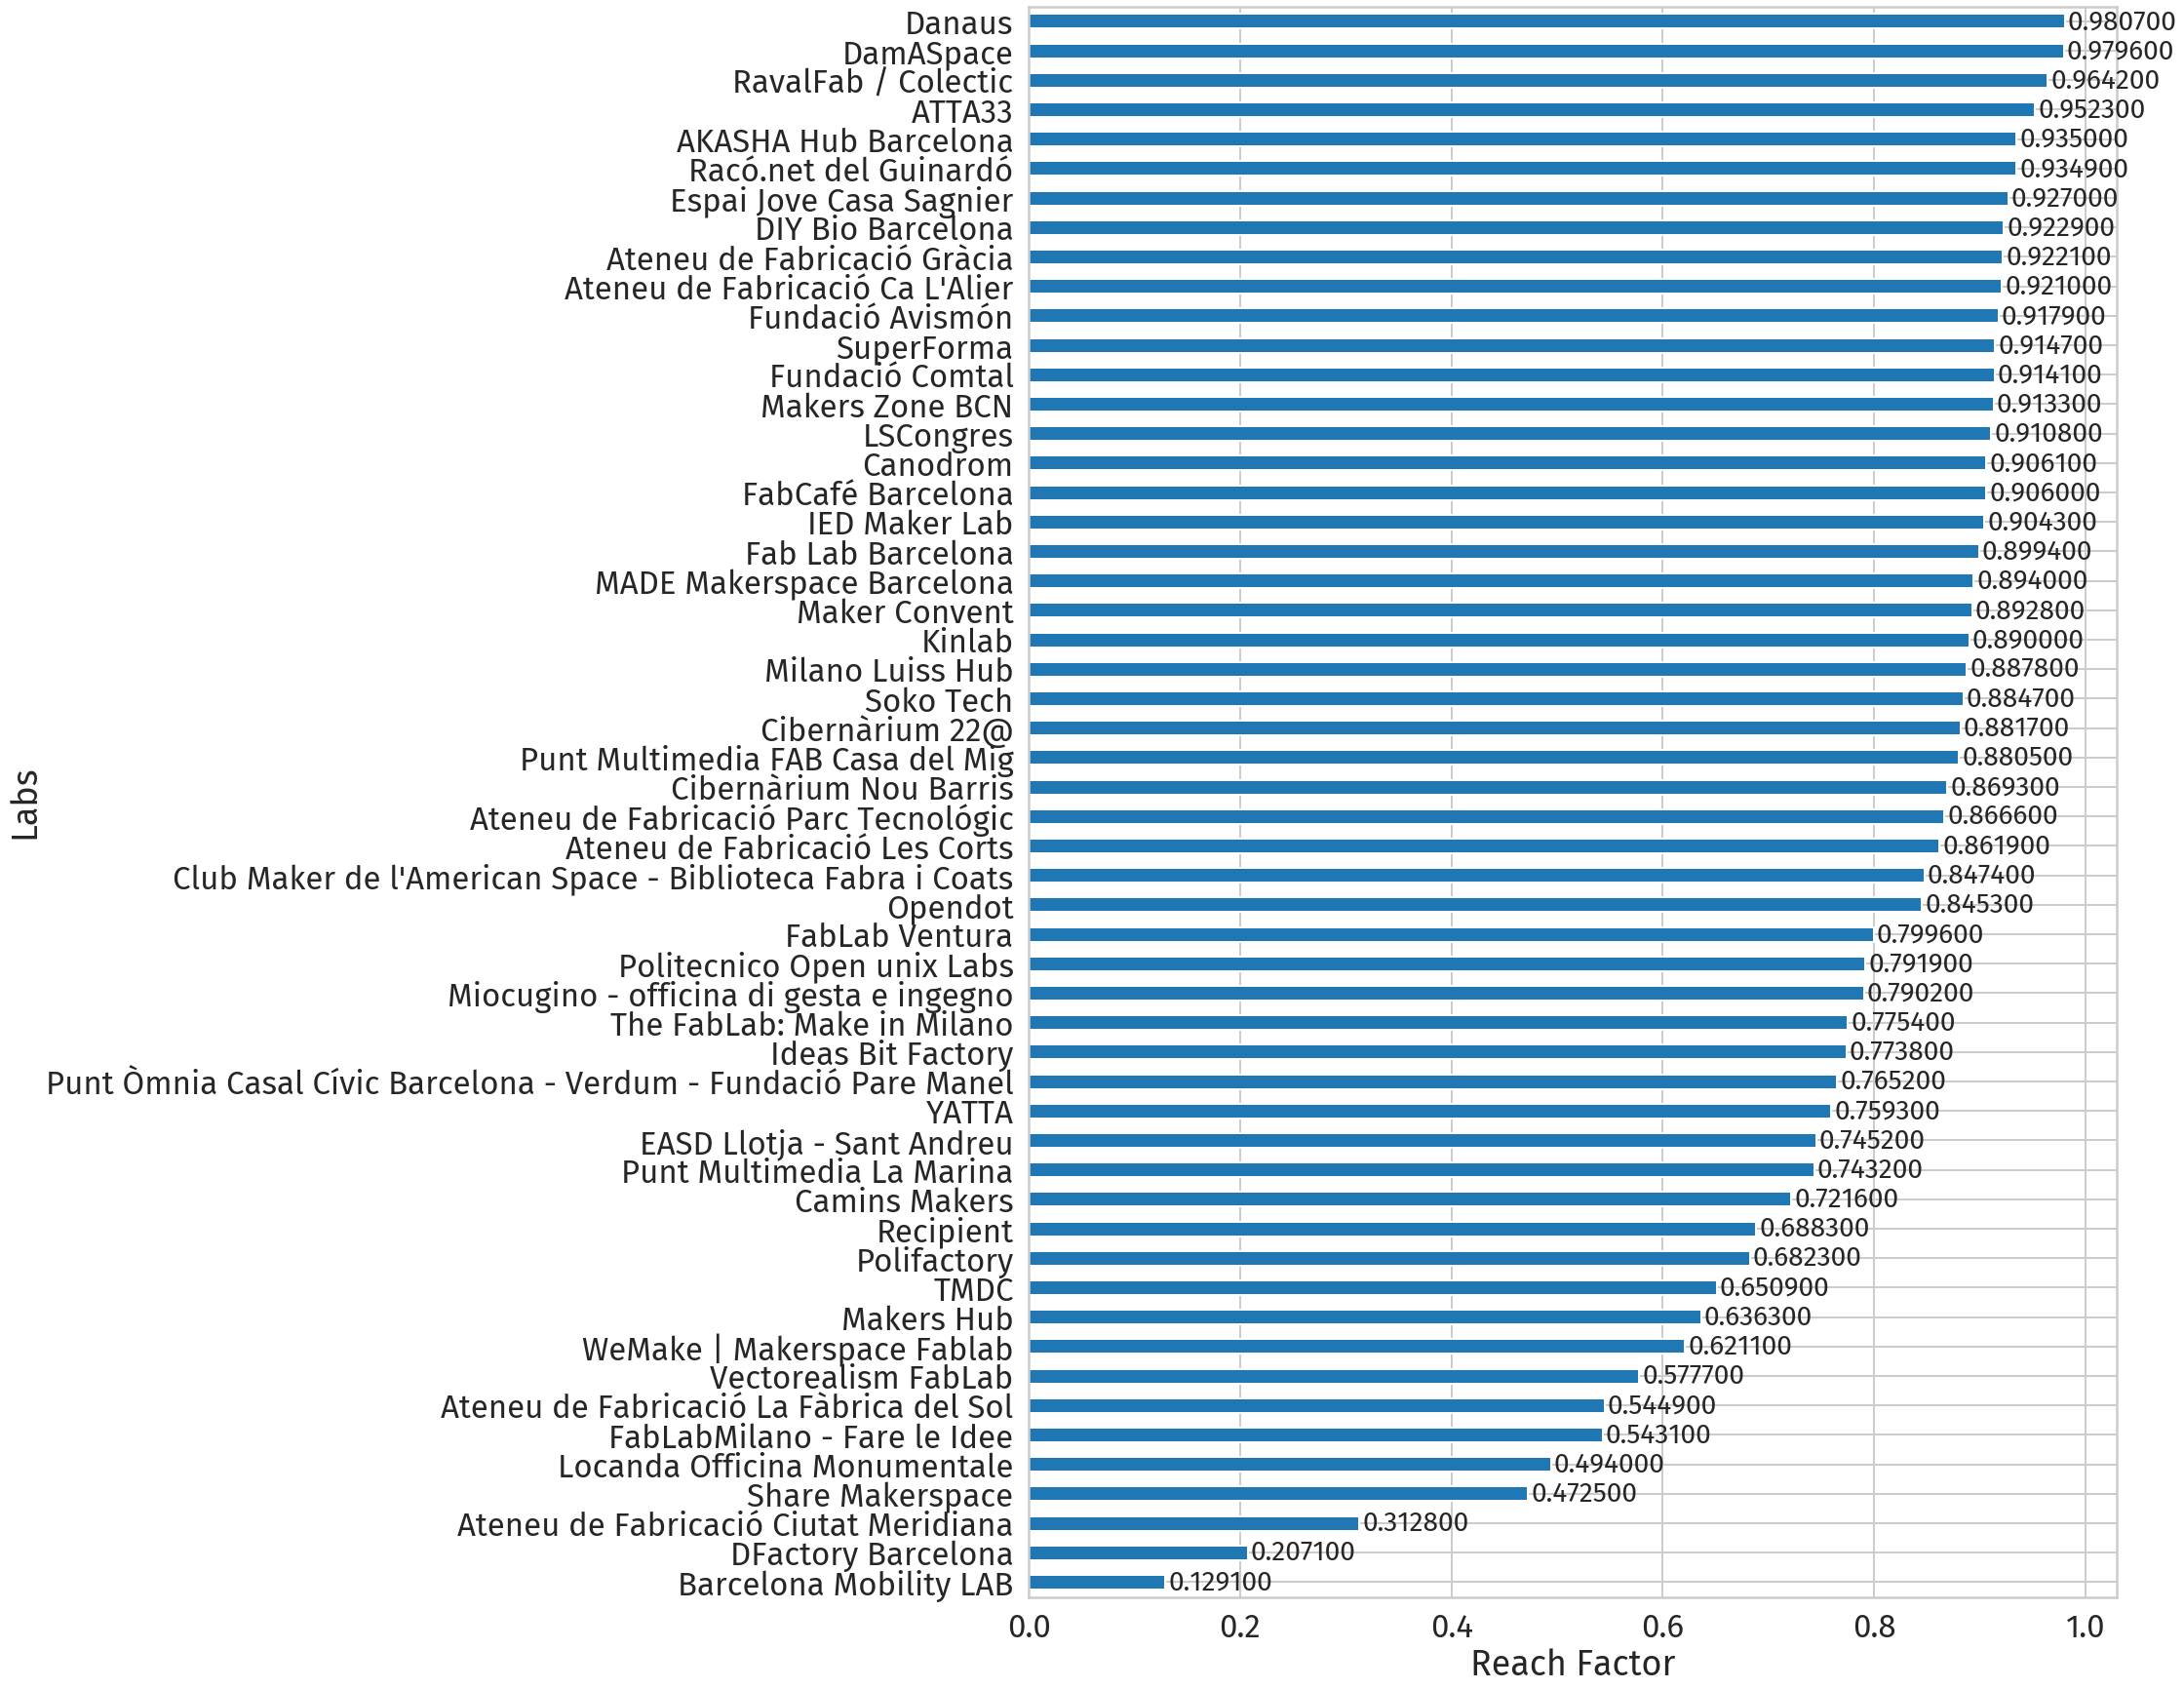

In [26]:
# Plot the data
ax = map_data.sort_values(by=['reachfactor'])['reachfactor'].plot(kind="barh", figsize=(20,30))
ax.bar_label(ax.containers[0], fmt="%f", size=28, padding=3)
plt.xlabel('Reach Factor')
plt.ylabel('Labs')
plt.savefig("svg/city_labs_reachfactor_bar.svg", bbox_inches="tight")
plt.savefig("png/city_labs_reachfactor_bar.png", dpi=300, bbox_inches="tight")

## Labs values clustered by city

In [27]:
full_map_data.groupby(["Cluster","Type"]).size()

Cluster  Type                 
BCN      Ateneu de Fabricació     6
         City Space               6
         DIYBio Lab               1
         Fab Lab                  6
         FabCafé                  1
         Foundation               2
         Hackerspace              2
         Incubator/Accelerator    3
         Library                  1
         Makerspace               3
         Service                  1
         University Lab           3
MI       DIYBio Lab               1
         Fab Lab                  6
         Hackerspace              1
         Incubator/Accelerator    1
         Makerspace               6
         Service                  3
         University Lab           1
dtype: int64

In [28]:
full_map_data.groupby("Cluster")["total_pop"].sum()

Cluster
BCN    2820726.0
MI      726510.0
Name: total_pop, dtype: float64

In [29]:
full_map_data.groupby("Cluster")["total_pop"].describe()

count          mean           std      min      25%      50%  \
Cluster                                                                 
BCN       35.0  80592.171429  23729.168534  11276.0  80365.0  89397.0   
MI        19.0  38237.368421  14227.134182  11593.0  28043.0  39433.0   

             75%       max  
Cluster                     
BCN      94294.5  101992.0  
MI       48990.0   60219.0

In [30]:
full_map_data.groupby("Cluster")["area"].sum()

Cluster
BCN    139.560691
MI      68.344160
Name: area, dtype: float64

In [31]:
full_map_data.groupby("Cluster")["area"].describe()

count      mean       std       min       25%       50%       75%  \
Cluster                                                                      
BCN       35.0  3.987448  1.018251  0.633896  3.957917  4.388387  4.513459   
MI        19.0  3.597061  0.715076  2.319425  3.086026  3.798499  4.037315   

              max  
Cluster            
BCN      4.814235  
MI       4.808589

In [32]:
full_map_data.groupby("Cluster")["reachfactor"].describe()

count      mean       std     min     25%     50%      75%     max
Cluster                                                                    
BCN       35.0  0.812311  0.207434  0.1291  0.8063  0.8940  0.91945  0.9807
MI        19.0  0.732784  0.145675  0.4725  0.6287  0.7738  0.82245  0.9796

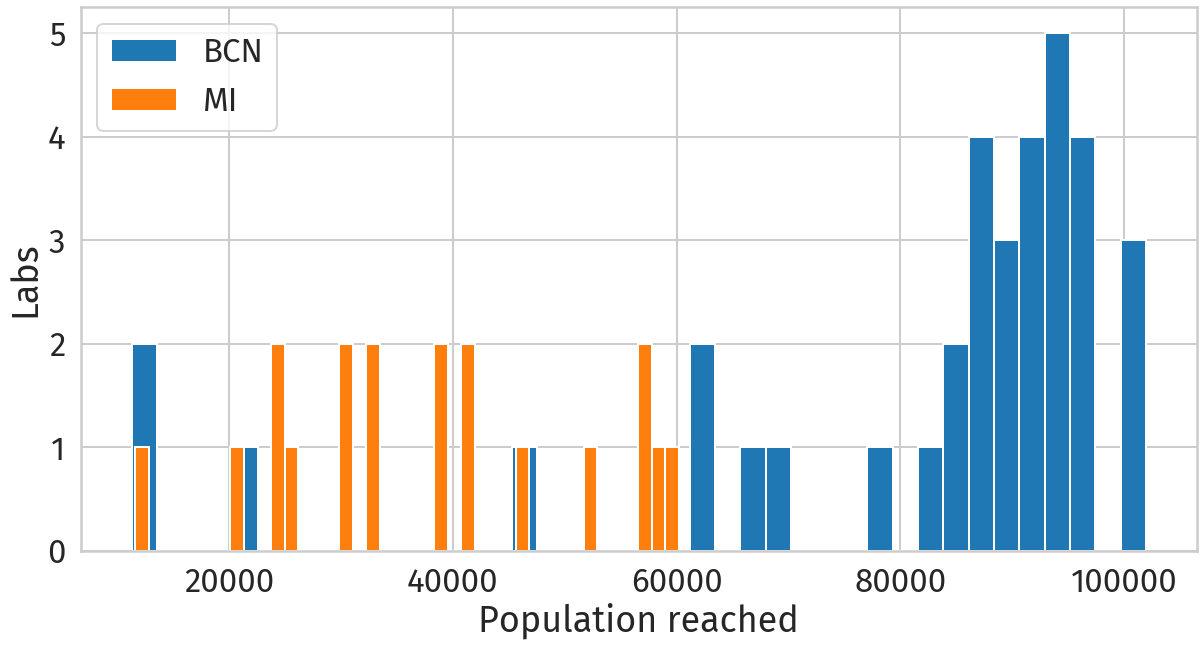

In [33]:
# Plot the data
full_map_data.groupby("Cluster")["total_pop"].plot(kind="hist", bins=40, figsize=(20,10), legend=True)
plt.xlabel('Population reached')
plt.ylabel('Labs')
plt.savefig("svg/city_labs_population_grouped_hist.svg", bbox_inches="tight")
plt.savefig("png/city_labs_population_grouped_hist.png", dpi=300, bbox_inches="tight")

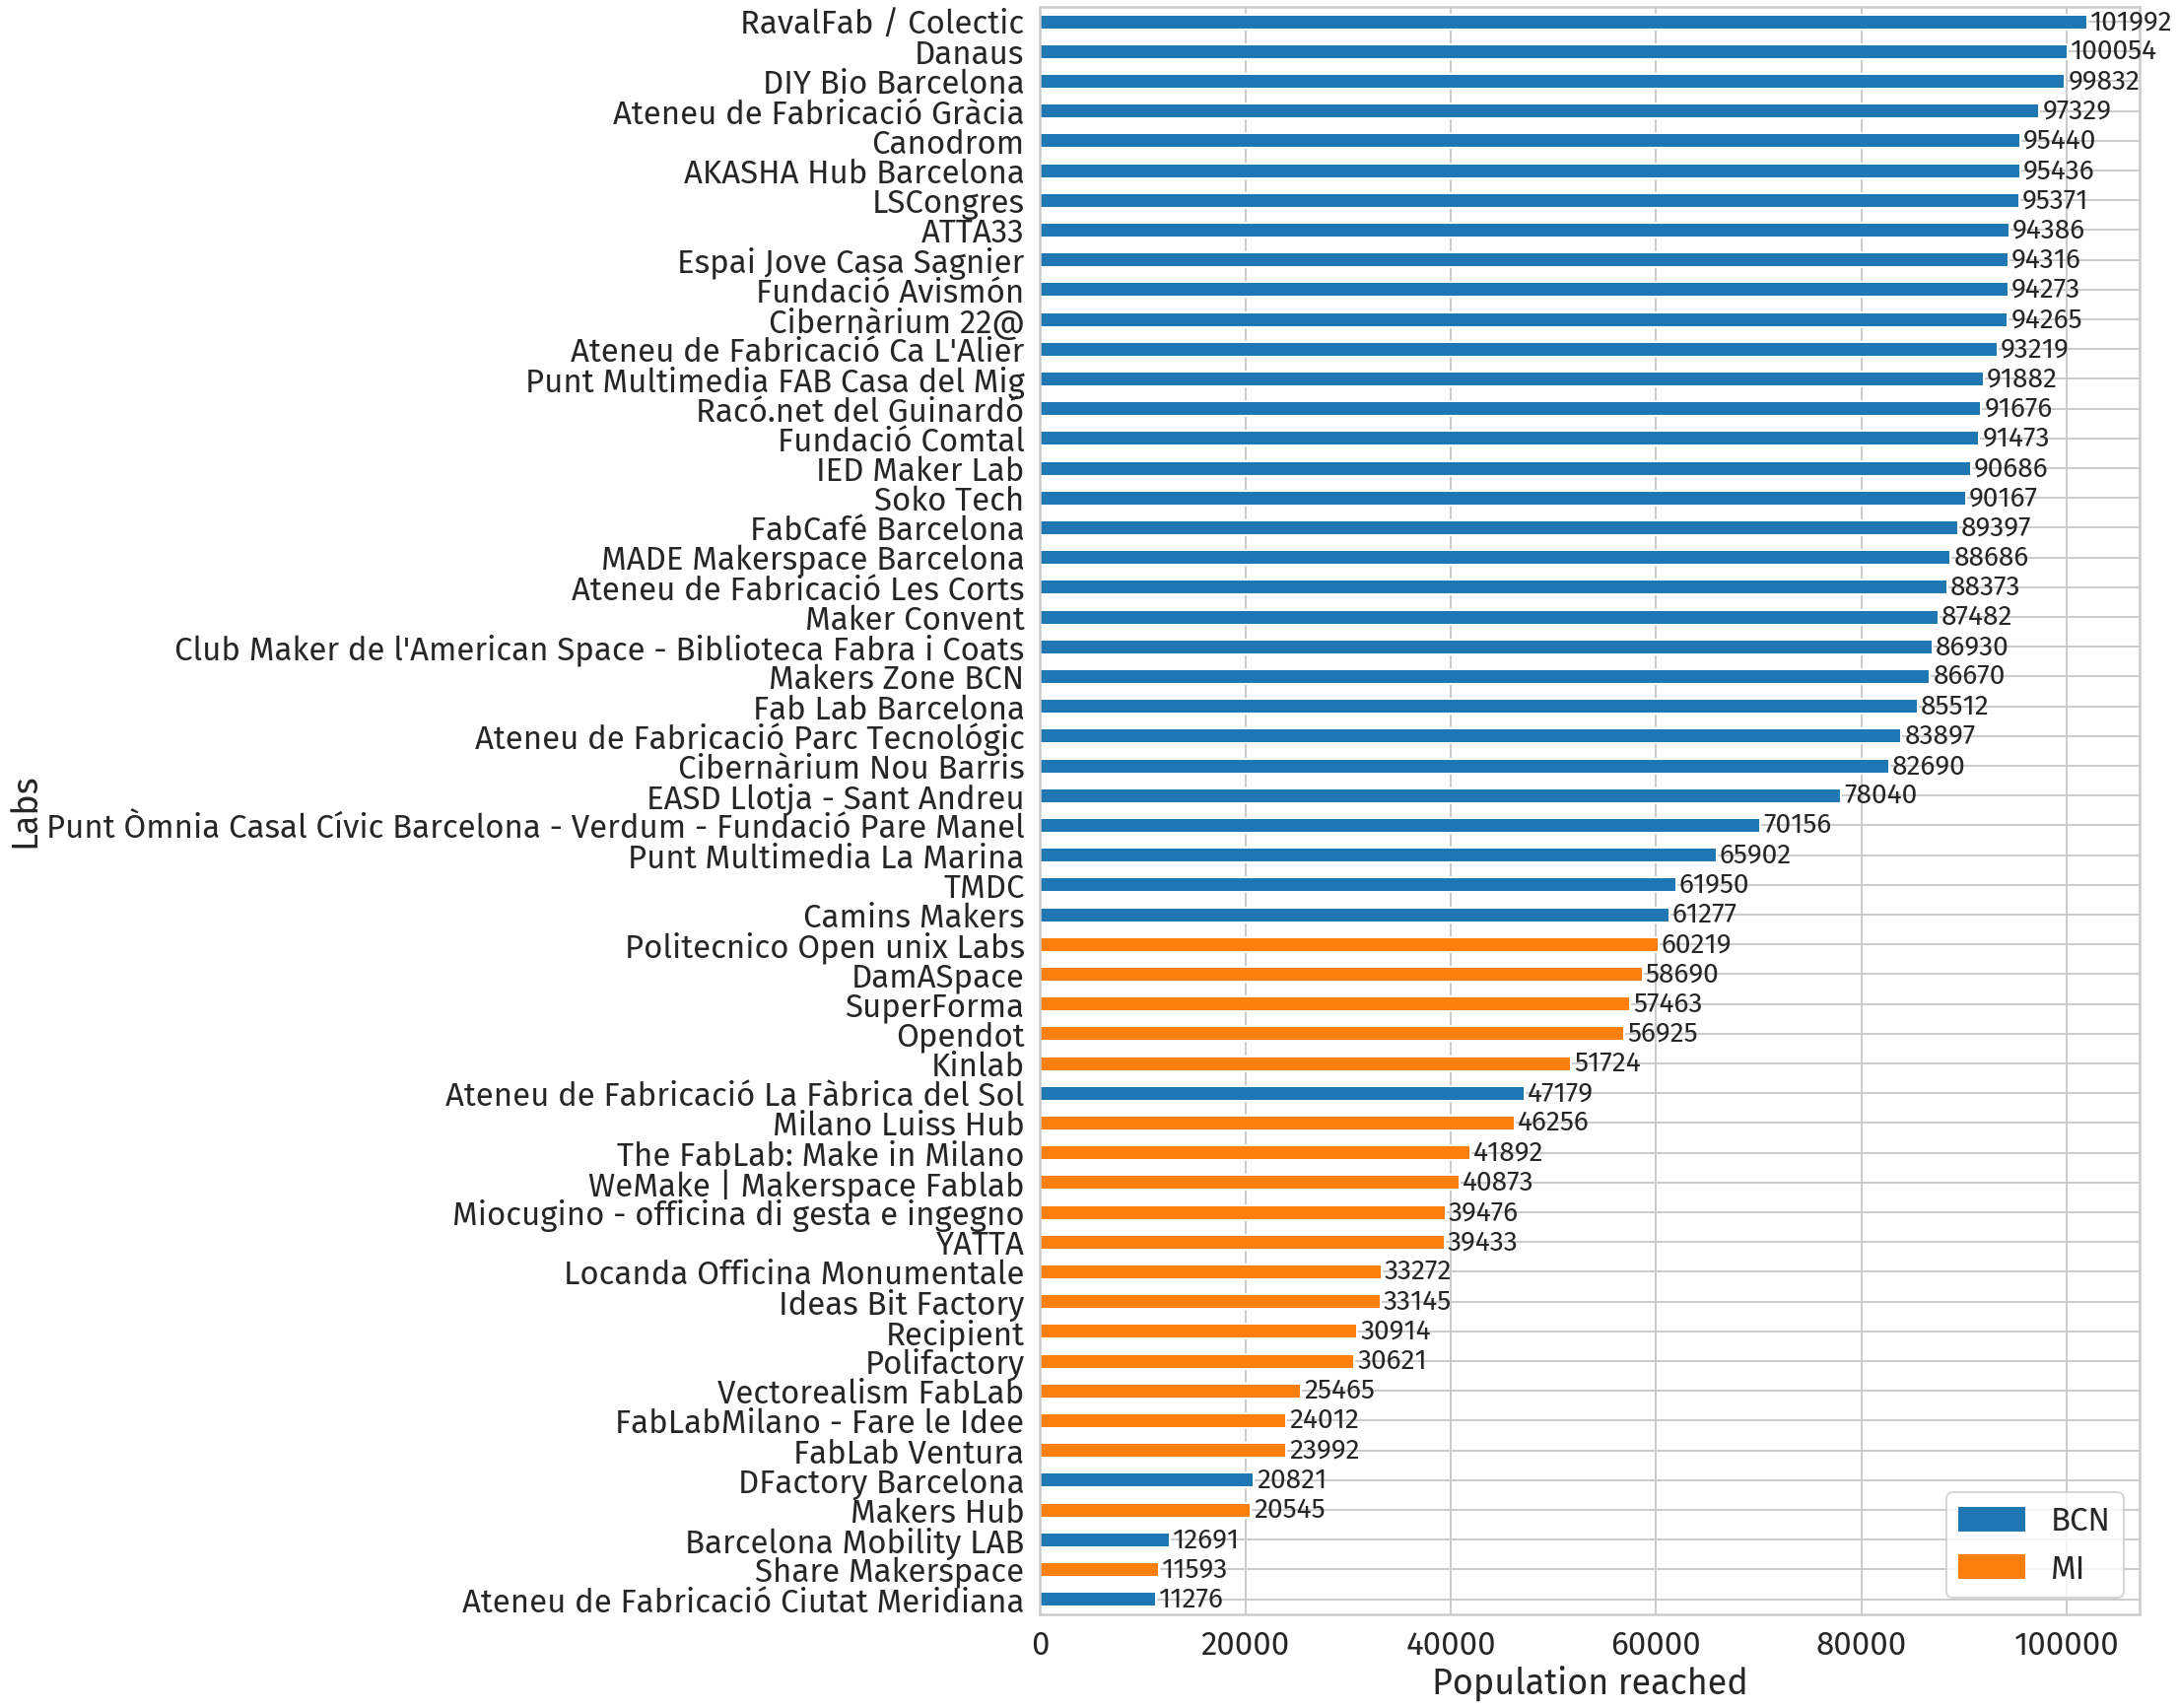

In [34]:
# Plot the data
colors = {'BCN': sns.color_palette()[0], 'MI': sns.color_palette()[1]}
ax = full_map_data.sort_values(by=['total_pop'])['total_pop'].plot(kind='barh', color=[colors[i] for i in full_map_data.sort_values(by=['total_pop'])['Cluster']], figsize=(20,30), legend=True)
ax.bar_label(ax.containers[0], fmt="%d", size=28, padding=3)
legend_elements = [Patch(facecolor=colors['BCN'], edgecolor=colors['BCN'],label='BCN'), Patch(facecolor=colors['MI'], edgecolor=colors['MI'],label='MI')]
ax.legend(handles=legend_elements)
plt.xlabel('Population reached')
plt.ylabel('Labs')
plt.savefig("svg/city_labs_population_grouped_bar.svg", bbox_inches="tight")
plt.savefig("png/city_labs_population_grouped_bar.png", dpi=300, bbox_inches="tight")

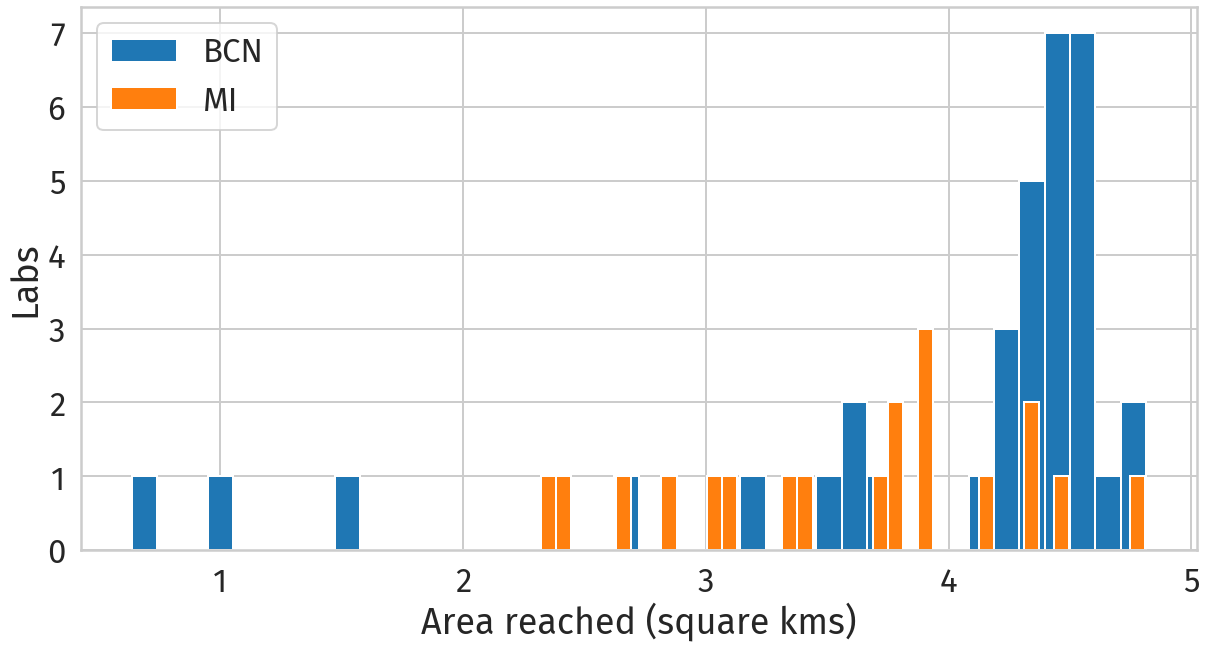

In [35]:
# Plot the data
full_map_data.groupby("Cluster")["area"].plot(kind="hist", bins=40, figsize=(20,10), legend=True)
plt.xlabel('Area reached (square kms)')
plt.ylabel('Labs')
plt.savefig("svg/city_labs_area_grouped_hist.svg", bbox_inches="tight")
plt.savefig("png/city_labs_area_grouped_hist.png", dpi=300, bbox_inches="tight")

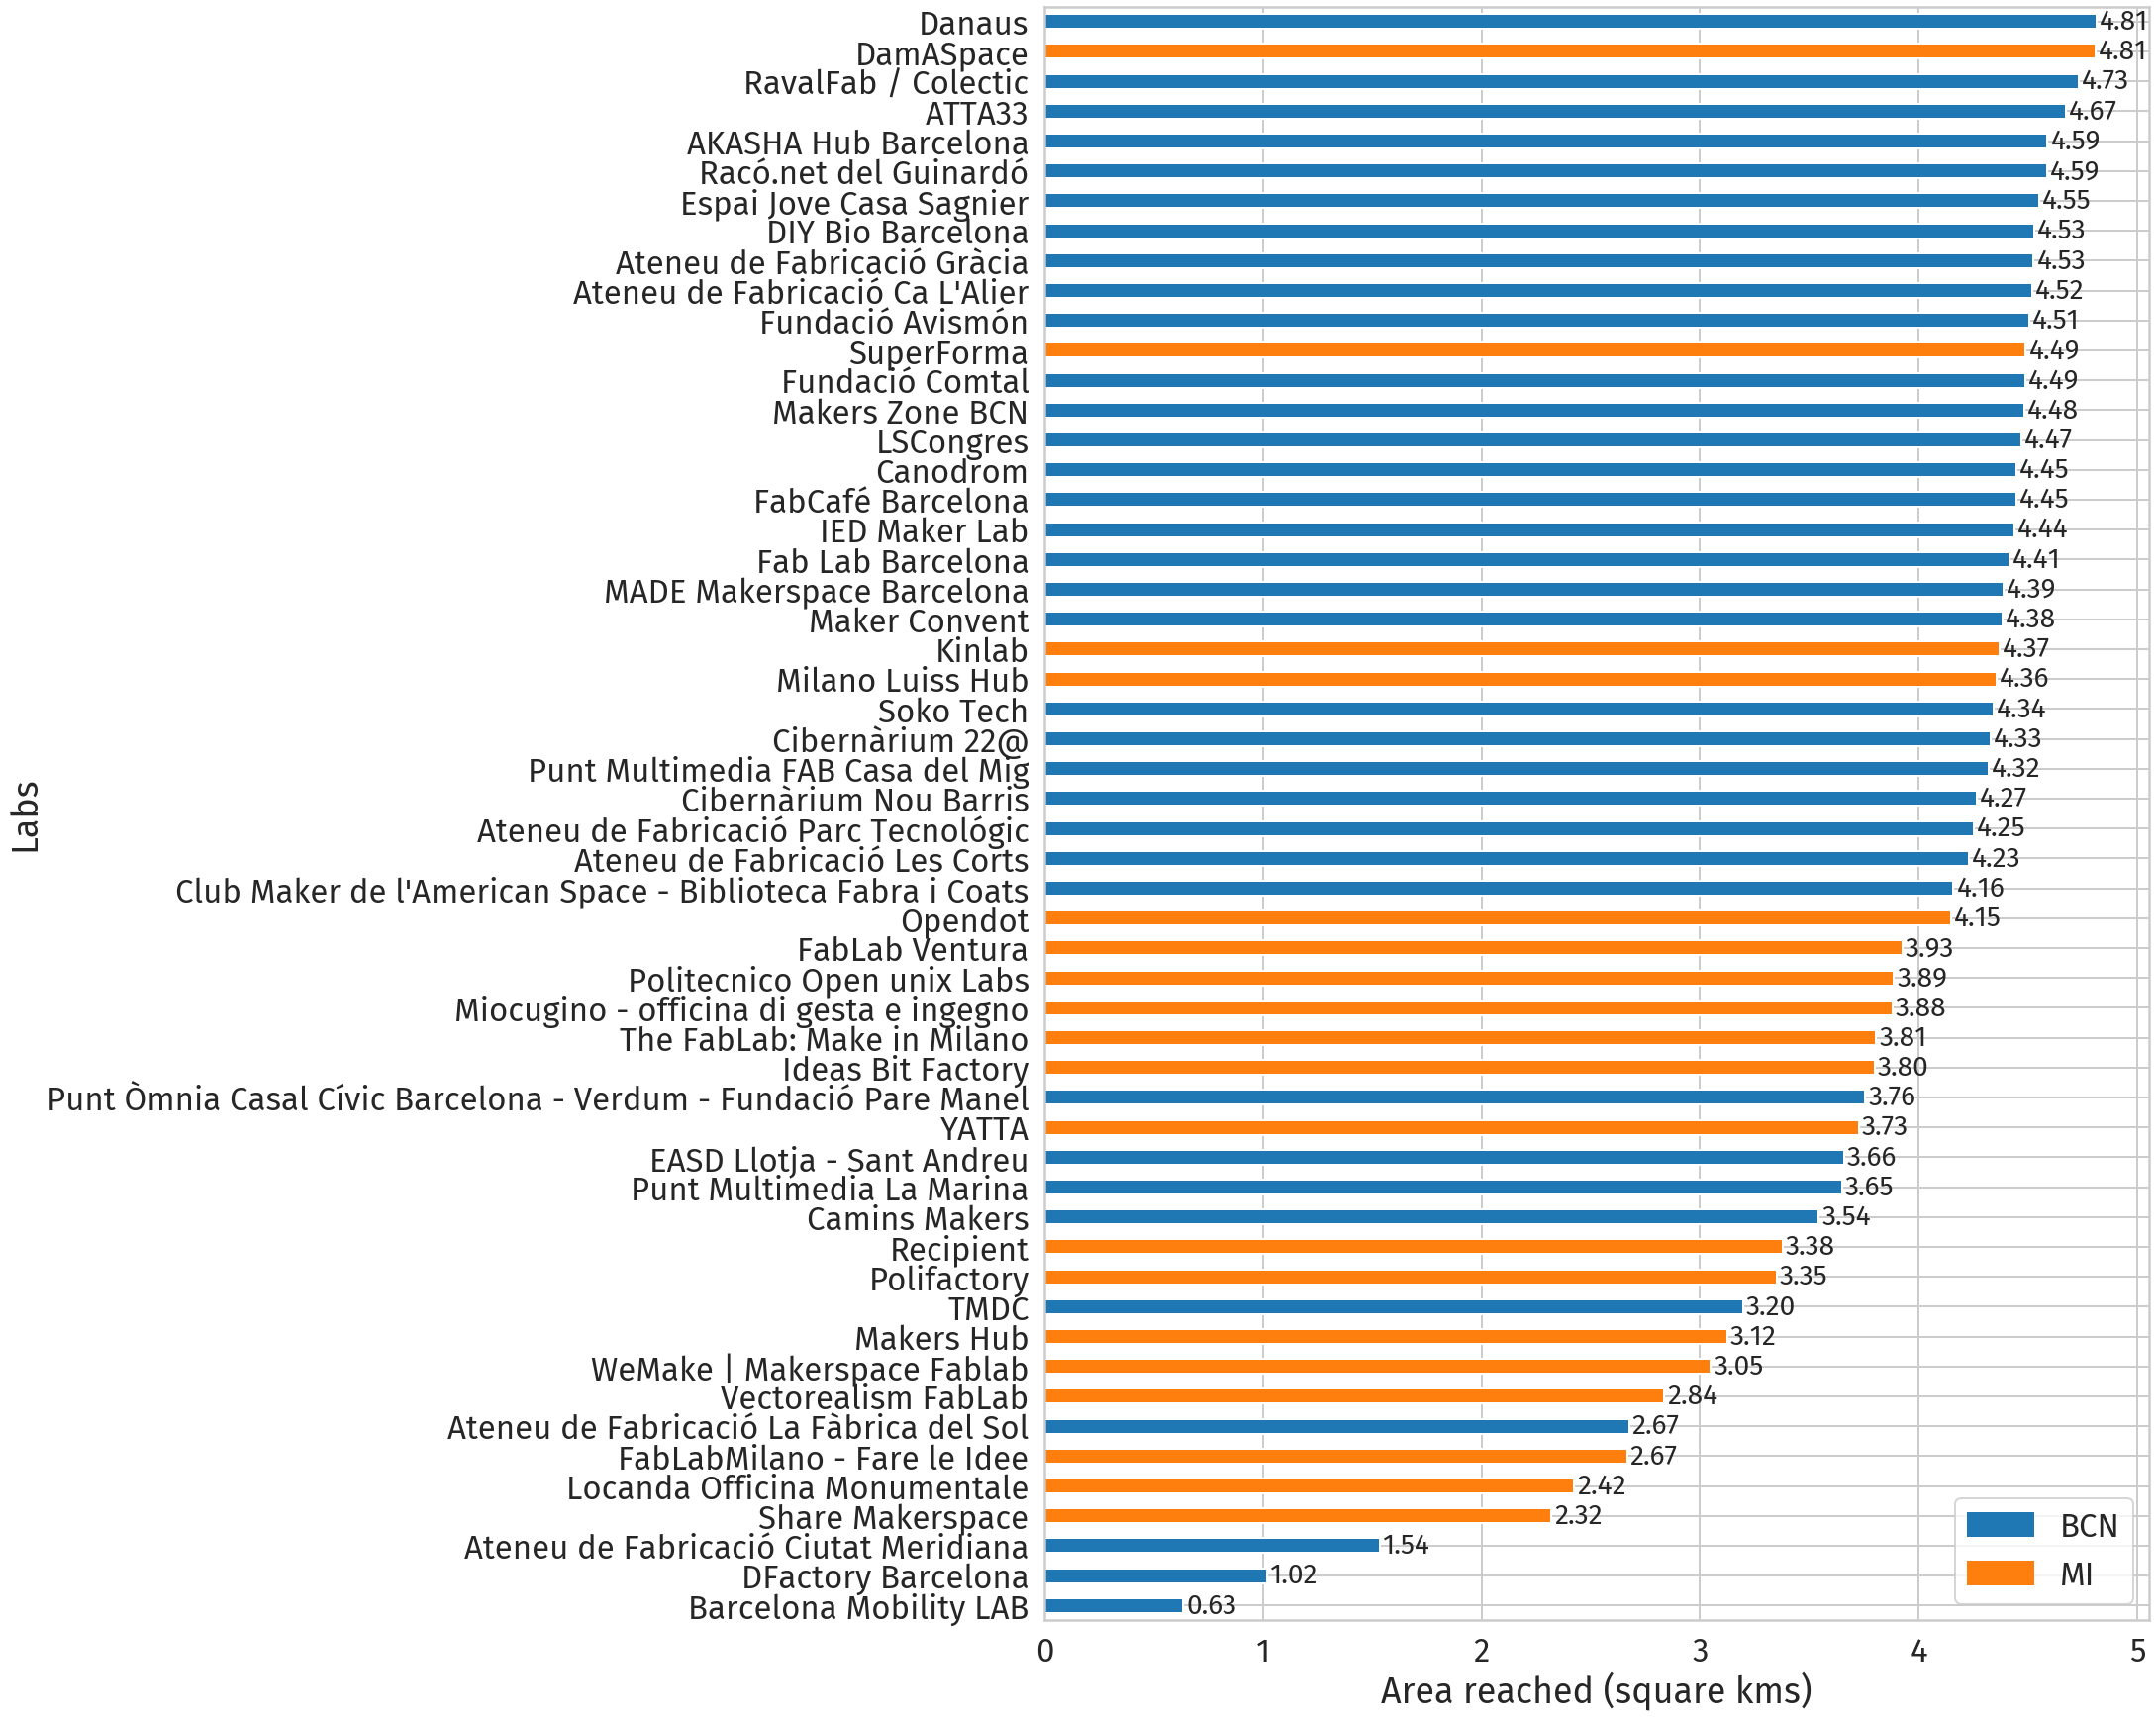

In [36]:
# Plot the data
colors = {'BCN': sns.color_palette()[0], 'MI': sns.color_palette()[1]}
ax = full_map_data.sort_values(by=['area'])['area'].plot(kind='barh', color=[colors[i] for i in full_map_data.sort_values(by=['area'])['Cluster']], figsize=(20,30), legend=True)
ax.bar_label(ax.containers[0], fmt="%.2f", size=28, padding=3)
legend_elements = [Patch(facecolor=colors['BCN'], edgecolor=colors['BCN'],label='BCN'), Patch(facecolor=colors['MI'], edgecolor=colors['MI'],label='MI')]
ax.legend(handles=legend_elements)
plt.xlabel('Area reached (square kms)')
plt.ylabel('Labs')
plt.savefig("svg/city_labs_area_grouped_bar.svg", bbox_inches="tight")
plt.savefig("png/city_labs_area_grouped_bar.png", dpi=300, bbox_inches="tight")

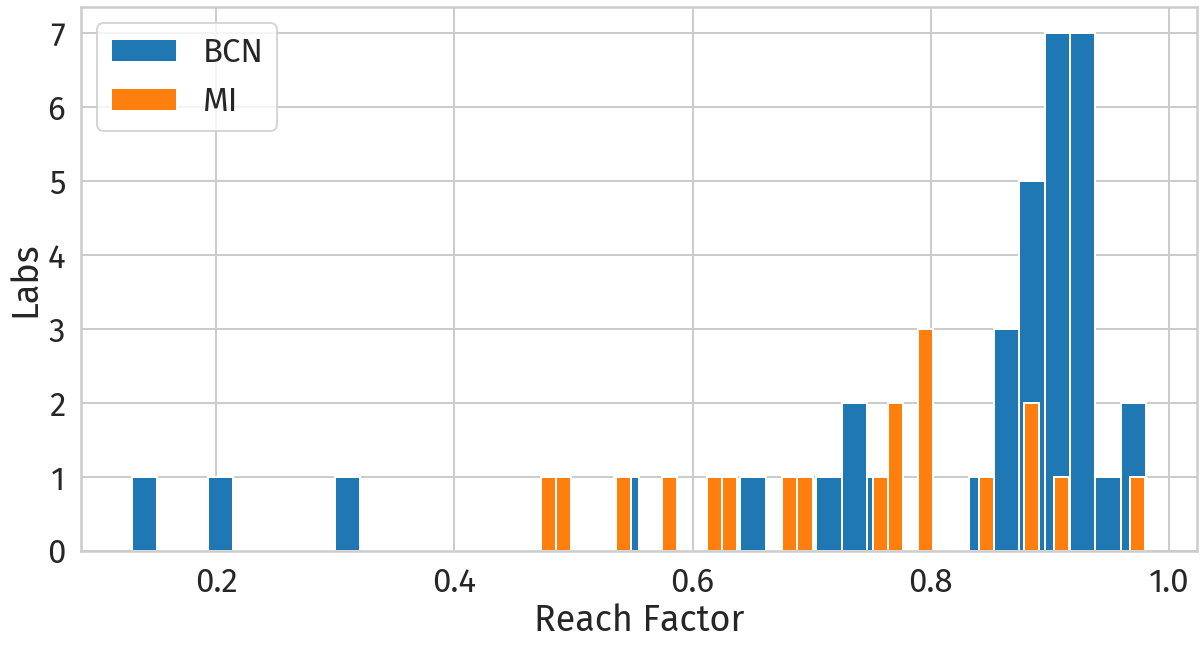

In [37]:
# Plot the data
full_map_data.groupby("Cluster")["reachfactor"].plot(kind="hist", bins=40, figsize=(20,10), legend=True)
plt.xlabel('Reach Factor')
plt.ylabel('Labs')
plt.savefig("svg/city_labs_reachfactor_grouped_hist.svg", bbox_inches="tight")
plt.savefig("png/city_labs_reachfactor_grouped_hist.png", dpi=300, bbox_inches="tight")

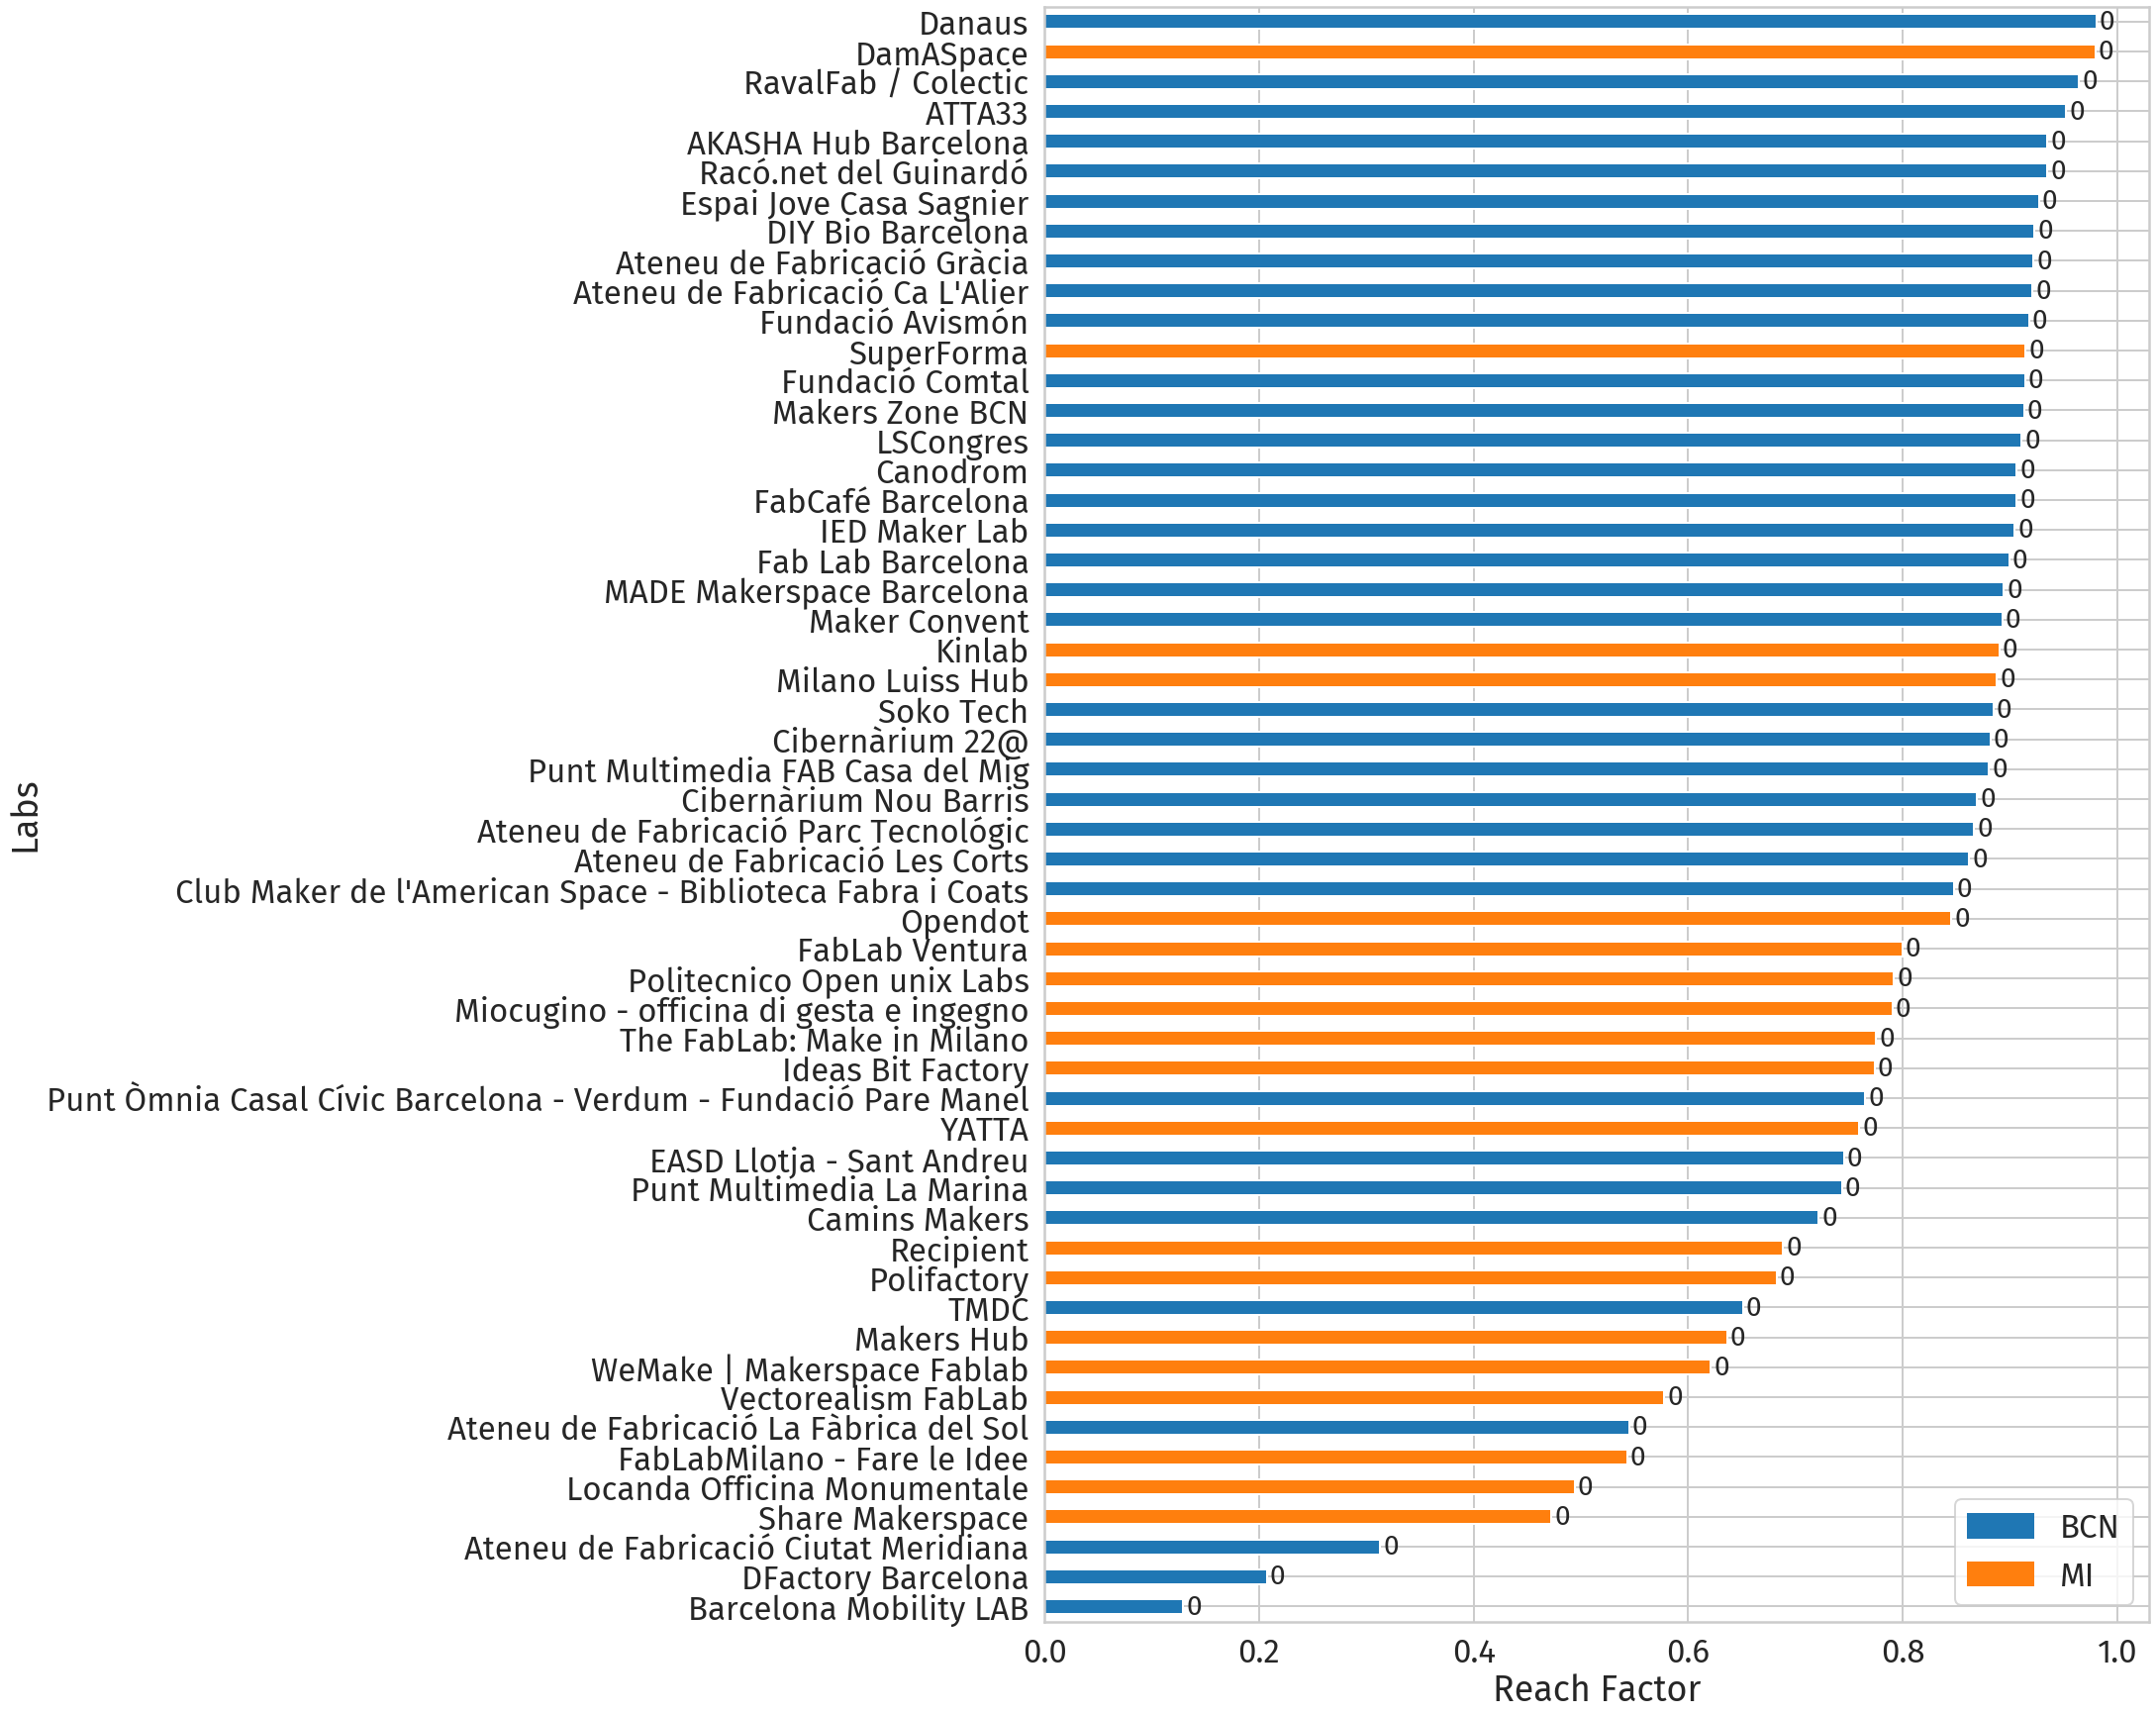

In [38]:
# Plot the data
colors = {'BCN': sns.color_palette()[0], 'MI': sns.color_palette()[1]}
ax = full_map_data.sort_values(by=['reachfactor'])['reachfactor'].plot(kind='barh', color=[colors[i] for i in full_map_data.sort_values(by=['reachfactor'])['Cluster']], figsize=(20,30), legend=True)
ax.bar_label(ax.containers[0], fmt="%d", size=28, padding=3)
legend_elements = [Patch(facecolor=colors['BCN'], edgecolor=colors['BCN'],label='BCN'), Patch(facecolor=colors['MI'], edgecolor=colors['MI'],label='MI')]
ax.legend(handles=legend_elements)
plt.xlabel('Reach Factor')
plt.ylabel('Labs')
plt.savefig("svg/city_labs_reachfactor_grouped_bar.svg", bbox_inches="tight")
plt.savefig("png/city_labs_reachfactor_grouped_bar.png", dpi=300, bbox_inches="tight")

## Isochrones

In [39]:
m=folium.Map(location=[41.396721,2.1943200000000003],tiles='stamentoner')
folium.TileLayer('OpenStreetMap').add_to(m)
folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)

In [40]:
for iso in data:
  folium.GeoJson(iso, name="geojson").add_to(m)
for loc in locations:
  #folium.Marker(location=[locations[loc][1],locations[loc][0]],popup=loc,tooltip=loc).add_to(folium.FeatureGroup(name='Labs').add_to(m))
  folium.Circle(
    radius=30,
    location=[locations[loc][1],locations[loc][0]],
    popup=loc,
    tooltip=loc,
    color="crimson",
    fill="crimson",
).add_to(m)


In [41]:
folium.LayerControl().add_to(m)
m

In [42]:
m.save("html/city_isochrones.html")

## Isochrones with color from population reached

In [43]:
linear = cmp.LinearColormap(
    ['yellow', 'green', 'blue'],
    vmin=map_data['total_pop'].min(), vmax=map_data['total_pop'].max(),
    caption='Total population'
)
linear

In [44]:
m=folium.Map(location=[41.396721,2.1943200000000003],tiles='stamentoner')
folium.TileLayer('OpenStreetMap').add_to(m)
folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)

In [45]:
for iso in data:
  fillColor = map_data.loc[iso["name"]]["total_pop"]
  folium.GeoJson(iso, 
                 name="geojson", 
                 style_function=lambda feature: {
                     "fillColor": linear(feature["properties"]["total_pop"]),
                     "fillOpacity": 0.3,
                     "color": "gray",
                     "weight": 1,
                     "dashArray": ''
                     },
                 ).add_to(m)

for loc in locations:
    #folium.Marker(location=[locations[loc][1],locations[loc][0]],popup=loc,tooltip=loc).add_to(folium.FeatureGroup(name='Labs').add_to(m))
    folium.Circle(
        radius=30,
        location=[locations[loc][1],locations[loc][0]],
        popup=loc,
        tooltip=loc,
        fill=True,
        color="crimson",
        fillColor="crimson"
    ).add_to(m)

folium.LayerControl().add_to(m)
m.add_child(linear)

In [46]:
m.save("html/city_isochrones_popcolor.html")

In [47]:
m=folium.Map(location=[41.396721,2.1943200000000003],tiles='stamentoner')
folium.TileLayer('OpenStreetMap').add_to(m)
folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)

for iso in data:
  fillColor = map_data.loc[iso["name"]]["total_pop"]
  folium.GeoJson(iso, 
                 name="geojson", 
                 style_function=lambda feature: {
                     "fillColor": linear(feature["properties"]["total_pop"]),
                     "fillOpacity": 0.3,
                     "color": "gray",
                     "weight": 1,
                     "dashArray": ''
                     },
                 ).add_to(m)

for loc in locations:
    #folium.Marker(location=[locations[loc][1],locations[loc][0]],popup=loc,tooltip=loc).add_to(folium.FeatureGroup(name='Labs').add_to(m))
    folium.Circle(
        radius=30,
        location=[locations[loc][1],locations[loc][0]],
        popup=loc,
        tooltip=loc,
        fill=True,
        color="crimson",
        fillColor="crimson"
    ).add_to(m)
    folium.map.Marker(
        [locations[loc][1] + 0.0, locations[loc][0] - 0.0],
        icon=folium.features.DivIcon(
            icon_size=(150,36),
            icon_anchor=(0,0),
            html='<div style="background-color: rgba(255, 255, 255, 0.75); padding: 5px; font-size: 10px; font-family:'+'Fira Sans;'+'">'+loc+'</div>',
        )
    ).add_to(m)

folium.LayerControl().add_to(m)
m.add_child(linear)

In [48]:
m.save("html/city_isochrones_popcolor_labels.html")